시간관계상 나머지 12개 관광지는 여기서 한 번에 올리도록 하겠습니다.
--

목표: 최적의 칼럼 찾기

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd

seoul=pd.read_csv('seoul.csv')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
seoul['열지수']=0

In [ ]:
# 원래는 기온, 습도으로 해주어야 하나, 여기서는 평균 기온과 평균 습도로 열지수의 평균을 구해주도록 하겠다.

i=0

for i in range(0,108):
    Tc=seoul.loc[i, '평균 기온(°C)']
    T=(Tc*1.8)+32
    R=seoul.loc[i, '평균 상대습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    seoul['열지수'][i]=Heat_index
    i+=1

In [ ]:
!pip install catboost

In [ ]:
!pip install lime

In [ ]:
!pip install shap

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgbm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
import catboost as cb
from lime import lime_tabular
import lime as lime
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/shap-0.26.0-py2.7-macosx-10.9-x86_64.egg')
import shap

a_관광지(ver_a)은 년-월, 월, 최고기온, 최소상대습도, 평균기온, 평균상대습도, 일강수량, 평균 풍속, 합계 일조시간 칼럼 부여
--

b_관광지(ver_b)는 모든 칼럼 부여
--

In [ ]:
a_종묘=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','종묘']]

a_창경궁=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','창경궁']]

a_창덕궁=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','창덕궁']]

a_남산골한옥마을=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','남산골한옥마을']]

a_덕수궁=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','덕수궁']]

a_서울시립미술관=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','서울시립미술관 본관']]

a_태릉강릉조선왕릉전시관=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','태릉 ·  강릉 · 조선왕릉전시관']]

a_서대문자연사박물관=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','서대문자연사박물관']]

a_서대문형무소역사관=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','서대문형무소역사관']]

a_트릭아이미술관=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','트릭아이미술관']]

a_헌릉인릉=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','헌릉ㆍ인릉']]

a_선릉정릉=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','선릉·정릉']]

In [ ]:
b_종묘=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '종묘']]

b_창경궁=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '창경궁']]

b_창덕궁=seoul[['date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '창덕궁']]

b_남산골한옥마을=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '남산골한옥마을']]

b_덕수궁=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '덕수궁']]

b_서울시립미술관=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '서울시립미술관 본관']]

b_태릉강릉조선왕릉전시관=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '태릉 ·  강릉 · 조선왕릉전시관']]

b_서대문자연사박물관=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '서대문자연사박물관']]

b_서대문형무소역사관=seoul[['date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '서대문형무소역사관']]

b_트릭아이미술관=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '트릭아이미술관']]

b_헌릉인릉=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '헌릉ㆍ인릉']]

b_선릉정릉=seoul[[ 'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)',
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '선릉·정릉']]

관광지별로 칼럼 7개 부여와 전부 부여 비교하여 보기
--

사용할 모델: xgboost

종묘 ver a > ver b
--

ver a

In [ ]:
x=a_종묘.drop(['종묘'], axis=1)
y=a_종묘['종묘']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     종묘   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     5.119
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.12e-05
Time:                        08:44:28   Log-Likelihood:                -1176.7
No. Observations:                 108   AIC:                             2373.
Df Residuals:                      98   BIC:                             2400.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.489e+05   1.67e+06     -0.210      0.834   -3.65e+06    2.96e+06
date             1.9820      8.262      0.240      0.811     -14.414      18.378
month         1018.1167    455.272      2.236      0.028     114.644    1921.589
최고 기온(°C)     5849.2915   3708.951      1.577      0.118   -1511.002    1.32e+04
최소 상대습도(%)    -775.7881    812.988     -0.954      0.342   -2389.136     837.560
평균 기온(°C)    -5258.1623   3807.896     -1.381      0.170   -1.28e+04    2298.482
평균 상대습도(%)    -211.1087    776.705     -0.272      0.786   -1752.455    1330.238
일강수량(mm)       273.2447    264.210      1.034      0.304    -251.072     797.561
평균 풍속(m/s)   -5529.5298   4568.120     -1.210      0.229   -1.46e+04    3535.755
합계 일조 시간(hr) -2359.3613   1902.278     -1.240      0.218   -6134.371    1415.648
==============================================================================
Omnibus:                       16.408   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.598
Skew:                           0.944   Prob(JB):                     9.15e-05
Kurtosis:                       3.754   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[08:45:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.993
rmse 점수는 11554.270355379873 입니다.
r2 점수는 0.66 입니다.
test 스코어는 0.6564739215392907 입니다.


ver_b

In [ ]:
x=b_종묘.drop(['종묘'], axis=1)
y=b_종묘['종묘']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     종묘   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     1.486
Date:                Thu, 08 Jul 2021   Prob (F-statistic):             0.0740
Time:                        08:47:02   Log-Likelihood:                -1152.5
No. Observations:                 108   AIC:                             2407.
Df Residuals:                      57   BIC:                             2544.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.496e+06   5.26e+06     -1.615      0.112    -1.9e+07    2.04e+06
date                  31.2378     22.815      1.369      0.176     -14.448      76.923
year                  -3.7358      9.274     -0.403      0.689     -22.306      14.835
month                404.8145    930.134      0.435      0.665   -1457.747    2267.376
평균 기온(°C)           1.736e+04   2.17e+04      0.800      0.427   -2.61e+04    6.08e+04
최저 기온(°C)           3834.5268   1.26e+04      0.305      0.761   -2.13e+04     2.9e+04
최저 기온 시각(hhmi)         5.2978     20.559      0.258      0.798     -35.871      46.467
최고 기온(°C)          -1131.7439   8948.396     -0.126      0.900   -1.91e+04    1.68e+04
최고 기온 시각(hhmi)        23.3304     31.920      0.731      0.468     -40.588      87.249
1시간 최다강수량 시각(hhmi)  -333.0688   1461.444     -0.228      0.821   -3259.560    2593.423
일강수량(mm)             540.4647   1659.622      0.326      0.746   -2782.871    3863.801
최대 순간풍속(m/s)        -443.5528   7380.882     -0.060      0.952   -1.52e+04    1.43e+04
최대 순간풍속 풍향(16방위)     142.8529    156.373      0.914      0.365    -170.278     455.984
최대 순간풍속 시각(hhmi)      13.4745     28.401      0.474      0.637     -43.398      70.347
최대 풍속(m/s)          4571.2704   1.68e+04      0.272      0.787   -2.91e+04    3.83e+04
최대 풍속 풍향(16방위)      -103.8194    202.926     -0.512      0.611    -510.171     302.532
최대 풍속 시각(hhmi)         9.4864     30.334      0.313      0.756     -51.256      70.228
평균 풍속(m/s)         -7.409e+04    3.1e+05     -0.239      0.812   -6.95e+05    5.47e+05
풍정합(100m)             76.8683    359.552      0.214      0.831    -643.122     796.859
최다 풍향(16방위)           14.9929     90.389      0.166      0.869    -166.009     195.994
평균 이슬점온도(°C)       -1.883e+04   1.38e+04     -1.368      0.177   -4.64e+04    8742.885
최소 상대습도(%)          1035.7673   1516.378      0.683      0.497   -2000.728    4072.263
평균 상대습도 시각(hhmi)      10.8386     29.670      0.365      0.716     -48.575      70.252
평균 상대습도(%)          4328.7770   3938.948      1.099      0.276   -3558.831    1.22e+04
평균 중기압(hPa)        -5987.5329   5235.595     -1.144      0.258   -1.65e+04    4496.565
평균 현지기압(hPa)        2.504e+05   1.85e+05      1.350      0.182   -1.21e+05    6.22e+05
최고 해면 기압(hPa)       1.131e+04   1.27e+04      0.888      0.378   -1.42e+04    3.68e+04
최고 해면기압 시각(hhmi)      -2.2663     19.267     -0.118      0.907     -40.848      36.315
최저 해면기압(hPa)        5283.2111   1.04e+04      0.506      0.615   -1.56e+04    2.62e+04
최저 해면기압 시각(hhmi)       8.4252     19.784      0.426      0.672     -31.192      48.042
평균 해면기압(hPa)       -2.627e+05   1.85e+05     -1.424      0.160   -6.32e+05    1.07e+05
가조시간(hr)            7147.5803   1.25e+04      0.573      0.569   -1.78e+04    3.21e+04
합계 일조 시간(hr)       -4996.3070   4792.3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[08:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.997
rmse 점수는 12672.226143267451 입니다.
r2 점수는 0.59 입니다.
test 스코어는 0.5867808021811869 입니다.


창경궁 ver_a > ver_b
--

ver_a

In [ ]:
x=a_창경궁.drop(['창경궁'], axis=1)
y=a_창경궁['창경궁']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    창경궁   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     12.83
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.77e-13
Time:                        08:49:04   Log-Likelihood:                -1240.7
No. Observations:                 108   AIC:                             2501.
Df Residuals:                      98   BIC:                             2528.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.229e+06   3.01e+06      0.408      0.684   -4.75e+06    7.21e+06
date            -6.6922     14.944     -0.448      0.655     -36.347      22.963
month         2231.4671    823.451      2.710      0.008     597.356    3865.579
최고 기온(°C)     3.386e+04   6708.382      5.047      0.000    2.05e+04    4.72e+04
최소 상대습도(%)   -1585.3375   1470.452     -1.078      0.284   -4503.401    1332.726
평균 기온(°C)    -3.315e+04   6887.342     -4.813      0.000   -4.68e+04   -1.95e+04
평균 상대습도(%)    1464.7360   1404.827      1.043      0.300   -1323.098    4252.570
일강수량(mm)       226.1157    477.877      0.473      0.637    -722.216    1174.448
평균 풍속(m/s)   -2414.5357   8262.360     -0.292      0.771   -1.88e+04     1.4e+04
합계 일조 시간(hr) -4699.3798   3440.652     -1.366      0.175   -1.15e+04    2128.482
==============================================================================
Omnibus:                        6.906   Durbin-Watson:                   2.310
Prob(Omnibus):                  0.032   Jarque-Bera (JB):               10.433
Skew:                           0.220   Prob(JB):                      0.00543
Kurtosis:                       4.458   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[08:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.985
rmse 점수는 27232.94333945563 입니다.
r2 점수는 0.61 입니다.
test 스코어는 0.6120332706343226 입니다.


ver_b

In [ ]:
x=b_창경궁.drop(['창경궁'], axis=1)
y=b_창경궁['창경궁']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    창경궁   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     4.280
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.28e-07
Time:                        08:49:51   Log-Likelihood:                -1198.6
No. Observations:                 108   AIC:                             2499.
Df Residuals:                      57   BIC:                             2636.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.766e+06   8.06e+06     -0.467      0.642   -1.99e+07    1.24e+07
date                  -0.8135     34.964     -0.023      0.982     -70.827      69.201
year                  18.9837     14.212      1.336      0.187      -9.476      47.443
month              -1899.1845   1425.446     -1.332      0.188   -4753.592     955.223
평균 기온(°C)            5.16e+04   3.32e+04      1.552      0.126    -1.5e+04    1.18e+05
최저 기온(°C)          -4019.4525   1.92e+04     -0.209      0.835   -4.26e+04    3.45e+04
최저 기온 시각(hhmi)        -9.9974     31.507     -0.317      0.752     -73.089      53.095
최고 기온(°C)           2925.6140   1.37e+04      0.213      0.832   -2.45e+04    3.04e+04
최고 기온 시각(hhmi)        23.2757     48.918      0.476      0.636     -74.680     121.232
1시간 최다강수량 시각(hhmi)   280.7056   2239.688      0.125      0.901   -4204.193    4765.604
일강수량(mm)           -1354.4581   2543.399     -0.533      0.596   -6447.527    3738.611
최대 순간풍속(m/s)        2460.2658   1.13e+04      0.218      0.829   -2.02e+04    2.51e+04
최대 순간풍속 풍향(16방위)     258.7657    239.644      1.080      0.285    -221.113     738.644
최대 순간풍속 시각(hhmi)       4.8745     43.526      0.112      0.911     -82.284      92.033
최대 풍속(m/s)         -1.386e+04   2.58e+04     -0.537      0.593   -6.55e+04    3.78e+04
최대 풍속 풍향(16방위)      -355.9958    310.987     -1.145      0.257    -978.736     266.745
최대 풍속 시각(hhmi)       -38.0589     46.487     -0.819      0.416    -131.147      55.029
평균 풍속(m/s)          4.362e+05   4.75e+05      0.918      0.363   -5.16e+05    1.39e+06
풍정합(100m)           -495.2520    551.019     -0.899      0.373   -1598.649     608.146
최다 풍향(16방위)          204.5454    138.523      1.477      0.145     -72.842     481.933
평균 이슬점온도(°C)       -5.088e+04   2.11e+04     -2.411      0.019   -9.31e+04   -8620.765
최소 상대습도(%)          -333.7297   2323.876     -0.144      0.886   -4987.211    4319.751
평균 상대습도 시각(hhmi)      -3.9405     45.470     -0.087      0.931     -94.993      87.112
평균 상대습도(%)          1.523e+04   6036.505      2.522      0.014    3138.727    2.73e+04
평균 중기압(hPa)        -7203.2074   8023.638     -0.898      0.373   -2.33e+04    8863.851
평균 현지기압(hPa)        3.002e+05   2.84e+05      1.056      0.295   -2.69e+05    8.69e+05
최고 해면 기압(hPa)       8918.7149   1.95e+04      0.457      0.650   -3.02e+04     4.8e+04
최고 해면기압 시각(hhmi)     -48.6810     29.527     -1.649      0.105    -107.808      10.446
최저 해면기압(hPa)        1513.5011    1.6e+04      0.095      0.925   -3.05e+04    3.35e+04
최저 해면기압 시각(hhmi)      19.7884     30.320      0.653      0.517     -40.926      80.502
평균 해면기압(hPa)       -3.051e+05   2.83e+05     -1.079      0.285   -8.71e+05    2.61e+05
가조시간(hr)            1.921e+04   1.91e+04      1.005      0.319   -1.91e+04    5.75e+04
합계 일조 시간(hr)        8167.0956   7344.3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[08:50:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.997
rmse 점수는 28748.32458183583 입니다.
r2 점수는 0.57 입니다.
test 스코어는 0.5676550426956146 입니다.


창덕궁 ver_a > ver_b
--

ver_a

In [ ]:
x=a_창덕궁.drop(['창덕궁'], axis=1)
y=a_창덕궁['창덕궁']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    창덕궁   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     12.01
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.40e-12
Time:                        08:51:37   Log-Likelihood:                -1293.1
No. Observations:                 108   AIC:                             2606.
Df Residuals:                      98   BIC:                             2633.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8.277e+06   4.89e+06      1.692      0.094   -1.43e+06     1.8e+07
date           -41.6579     24.267     -1.717      0.089     -89.816       6.500
month         5162.8276   1337.236      3.861      0.000    2509.126    7816.529
최고 기온(°C)     6.506e+04   1.09e+04      5.972      0.000    4.34e+04    8.67e+04
최소 상대습도(%)    -733.3769   2387.928     -0.307      0.759   -5472.142    4005.389
평균 기온(°C)    -6.374e+04   1.12e+04     -5.699      0.000   -8.59e+04   -4.15e+04
평균 상대습도(%)     343.1992   2281.357      0.150      0.881   -4184.080    4870.479
일강수량(mm)      -337.2910    776.045     -0.435      0.665   -1877.327    1202.745
평균 풍속(m/s)   -8518.1791   1.34e+04     -0.635      0.527   -3.51e+04    1.81e+04
합계 일조 시간(hr) -1.732e+04   5587.418     -3.100      0.003   -2.84e+04   -6234.967
==============================================================================
Omnibus:                       22.238   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.636
Skew:                           0.757   Prob(JB):                     1.01e-11
Kurtosis:                       5.993   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[08:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.992
rmse 점수는 36650.570021348096 입니다.
r2 점수는 0.74 입니다.
test 스코어는 0.7410450724287633 입니다.


ver_b

In [ ]:
x=b_창덕궁.drop(['창덕궁'], axis=1)
y=b_창덕궁['창덕궁']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    창덕궁   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4.417
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           7.28e-08
Time:                        08:52:03   Log-Likelihood:                -1247.7
No. Observations:                 108   AIC:                             2597.
Df Residuals:                      57   BIC:                             2734.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.099e+07   1.27e+07     -0.865      0.391   -3.64e+07    1.45e+07
date                  29.6443     55.097      0.538      0.593     -80.686     139.975
year                  29.2961     22.396      1.308      0.196     -15.551      74.143
month              -2899.9708   2246.269     -1.291      0.202   -7398.047    1598.105
평균 기온(°C)           4.854e+04   5.24e+04      0.927      0.358   -5.63e+04    1.53e+05
최저 기온(°C)           5236.5889   3.03e+04      0.173      0.864   -5.55e+04     6.6e+04
최저 기온 시각(hhmi)         8.8197     49.650      0.178      0.860     -90.603     108.242
최고 기온(°C)           1.501e+04   2.16e+04      0.695      0.490   -2.83e+04    5.83e+04
최고 기온 시각(hhmi)        20.2252     77.086      0.262      0.794    -134.137     174.588
1시간 최다강수량 시각(hhmi)   660.6599   3529.380      0.187      0.852   -6406.802    7728.122
일강수량(mm)            2906.6691   4007.979      0.725      0.471   -5119.170    1.09e+04
최대 순간풍속(m/s)       -1.334e+04   1.78e+04     -0.748      0.457    -4.9e+04    2.24e+04
최대 순간풍속 풍향(16방위)     294.1496    377.639      0.779      0.439    -462.060    1050.359
최대 순간풍속 시각(hhmi)      19.0442     68.589      0.278      0.782    -118.303     156.392
최대 풍속(m/s)          1.592e+04   4.06e+04      0.392      0.697   -6.55e+04    9.73e+04
최대 풍속 풍향(16방위)      -574.9451    490.064     -1.173      0.246   -1556.282     406.391
최대 풍속 시각(hhmi)       -46.8998     73.255     -0.640      0.525    -193.591      99.792
평균 풍속(m/s)          7.977e+04   7.49e+05      0.106      0.916   -1.42e+06    1.58e+06
풍정합(100m)            -99.1536    868.316     -0.114      0.909   -1837.927    1639.619
최다 풍향(16방위)          474.6306    218.290      2.174      0.034      37.513     911.748
평균 이슬점온도(°C)       -5.903e+04   3.33e+04     -1.775      0.081   -1.26e+05    7558.395
최소 상대습도(%)          1649.8618   3662.046      0.451      0.654   -5683.259    8982.983
평균 상대습도 시각(hhmi)      63.7517     71.654      0.890      0.377     -79.732     207.236
평균 상대습도(%)          1.663e+04   9512.540      1.748      0.086   -2416.366    3.57e+04
평균 중기압(hPa)        -2.113e+04   1.26e+04     -1.671      0.100   -4.64e+04    4193.111
평균 현지기압(hPa)        6.285e+05   4.48e+05      1.403      0.166   -2.68e+05    1.53e+06
최고 해면 기압(hPa)       -228.6042   3.08e+04     -0.007      0.994   -6.18e+04    6.14e+04
최고 해면기압 시각(hhmi)     -28.3717     46.530     -0.610      0.544    -121.546      64.803
최저 해면기압(hPa)       -1.523e+04   2.52e+04     -0.604      0.548   -6.57e+04    3.52e+04
최저 해면기압 시각(hhmi)      45.9784     47.779      0.962      0.340     -49.697     141.654
평균 해면기압(hPa)       -6.032e+05   4.46e+05     -1.353      0.181    -1.5e+06    2.89e+05
가조시간(hr)             2.85e+04   3.01e+04      0.947      0.348   -3.18e+04    8.88e+04
합계 일조 시간(hr)       -3166.3746   1.16e+

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[08:52:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.999
rmse 점수는 44326.677908676815 입니다.
r2 점수는 0.62 입니다.
test 스코어는 0.6212147313846101 입니다.


남산골 한옥마을 ver_a < ver_b
--

ver_a

In [ ]:
x=a_남산골한옥마을.drop(['남산골한옥마을'], axis=1)
y=a_남산골한옥마을['남산골한옥마을']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                남산골한옥마을   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     12.57
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.61e-13
Time:                        08:55:24   Log-Likelihood:                -1274.4
No. Observations:                 108   AIC:                             2569.
Df Residuals:                      98   BIC:                             2596.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.185e+07   4.11e+06      5.314      0.000    1.37e+07       3e+07
date          -107.3230     20.403     -5.260      0.000    -147.813     -66.833
month         2792.5101   1124.309      2.484      0.015     561.355    5023.666
최고 기온(°C)     3470.1367   9159.377      0.379      0.706   -1.47e+04    2.16e+04
최소 상대습도(%)   -6739.9694   2007.701     -3.357      0.001   -1.07e+04   -2755.753
평균 기온(°C)     -449.4730   9403.723     -0.048      0.962   -1.91e+04    1.82e+04
평균 상대습도(%)    2871.9440   1918.099      1.497      0.138    -934.461    6678.349
일강수량(mm)       952.6682    652.476      1.460      0.147    -342.149    2247.486
평균 풍속(m/s)   -1.581e+04   1.13e+04     -1.401      0.164   -3.82e+04    6578.170
합계 일조 시간(hr) -1.111e+04   4697.739     -2.365      0.020   -2.04e+04   -1787.142
==============================================================================
Omnibus:                        0.312   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.244
Skew:                           0.115   Prob(JB):                        0.885
Kurtosis:                       2.960   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[08:55:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.996
rmse 점수는 22452.61803856131 입니다.
r2 점수는 0.69 입니다.
test 스코어는 0.6874763913670736 입니다.


ver_b

In [ ]:
x=b_남산골한옥마을.drop(['남산골한옥마을'], axis=1)
y=b_남산골한옥마을['남산골한옥마을']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                남산골한옥마을   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     6.497
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           3.99e-11
Time:                        08:56:06   Log-Likelihood:                -1213.1
No. Observations:                 108   AIC:                             2528.
Df Residuals:                      57   BIC:                             2665.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.082e+07   9.22e+06      1.173      0.246   -7.65e+06    2.93e+07
date                 -64.4737     39.995     -1.612      0.112    -144.563      15.616
year                  -0.8081     16.257     -0.050      0.961     -33.363      31.747
month                 16.3331   1630.576      0.010      0.992   -3248.838    3281.505
평균 기온(°C)            1.02e+05    3.8e+04      2.683      0.010    2.59e+04    1.78e+05
최저 기온(°C)          -2.896e+04    2.2e+04     -1.315      0.194    -7.3e+04    1.51e+04
최저 기온 시각(hhmi)        -3.8687     36.041     -0.107      0.915     -76.040      68.303
최고 기온(°C)          -4.944e+04   1.57e+04     -3.151      0.003   -8.09e+04    -1.8e+04
최고 기온 시각(hhmi)       -30.1463     55.957     -0.539      0.592    -142.199      81.906
1시간 최다강수량 시각(hhmi)  1773.8698   2561.991      0.692      0.492   -3356.429    6904.169
일강수량(mm)            2181.5481   2909.408      0.750      0.456   -3644.441    8007.537
최대 순간풍속(m/s)        9589.6452   1.29e+04      0.741      0.462   -1.63e+04    3.55e+04
최대 순간풍속 풍향(16방위)      59.8993    274.130      0.219      0.828    -489.037     608.835
최대 순간풍속 시각(hhmi)     -33.5110     49.789     -0.673      0.504    -133.212      66.190
최대 풍속(m/s)         -6103.8896   2.95e+04     -0.207      0.837   -6.52e+04     5.3e+04
최대 풍속 풍향(16방위)       -76.3736    355.739     -0.215      0.831    -788.730     635.982
최대 풍속 시각(hhmi)        41.7817     53.176      0.786      0.435     -64.702     148.266
평균 풍속(m/s)          2.945e+05   5.44e+05      0.542      0.590   -7.94e+05    1.38e+06
풍정합(100m)           -365.0319    630.314     -0.579      0.565   -1627.214     897.150
최다 풍향(16방위)          172.3162    158.457      1.087      0.281    -144.989     489.622
평균 이슬점온도(°C)       -1.454e+04   2.41e+04     -0.602      0.549   -6.29e+04    3.38e+04
최소 상대습도(%)         -1125.3564   2658.294     -0.423      0.674   -6448.498    4197.785
평균 상대습도 시각(hhmi)      47.4275     52.014      0.912      0.366     -56.728     151.583
평균 상대습도(%)          7801.9037   6905.191      1.130      0.263   -6025.502    2.16e+04
평균 중기압(hPa)        -1.032e+04   9178.283     -1.125      0.265   -2.87e+04    8056.486
평균 현지기압(hPa)        2.757e+05   3.25e+05      0.848      0.400   -3.75e+05    9.27e+05
최고 해면 기압(hPa)       8089.8507   2.23e+04      0.362      0.718   -3.66e+04    5.28e+04
최고 해면기압 시각(hhmi)       3.3782     33.776      0.100      0.921     -64.258      71.014
최저 해면기압(hPa)        6840.6533   1.83e+04      0.374      0.710   -2.98e+04    4.35e+04
최저 해면기압 시각(hhmi)     -24.2062     34.683     -0.698      0.488     -93.657      45.245
평균 해면기압(hPa)       -2.868e+05   3.24e+05     -0.887      0.379   -9.35e+05    3.61e+05
가조시간(hr)            3.638e+04   2.19e+04      1.664      0.102   -7389.150    8.02e+04
합계 일조 시간(hr)        5368.2675   8401.2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[08:56:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.999
rmse 점수는 17892.613121001923 입니다.
r2 점수는 0.8 입니다.
test 스코어는 0.8015293020057337 입니다.


덕수궁 ver_a > ver b
--

ver_a

In [ ]:
x=a_덕수궁.drop(['덕수궁'], axis=1)
y=a_덕수궁['덕수궁']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    덕수궁   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     7.407
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           3.51e-08
Time:                        09:03:10   Log-Likelihood:                -1311.7
No. Observations:                 108   AIC:                             2643.
Df Residuals:                      98   BIC:                             2670.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.799e+06   5.81e+06     -0.998      0.321   -1.73e+07    5.73e+06
date            28.9135     28.826      1.003      0.318     -28.291      86.118
month         4300.9977   1588.426      2.708      0.008    1148.818    7453.178
최고 기온(°C)     4.027e+04   1.29e+04      3.112      0.002    1.46e+04    6.59e+04
최소 상대습도(%)   -1717.5394   2836.483     -0.606      0.546   -7346.447    3911.368
평균 기온(°C)    -3.923e+04   1.33e+04     -2.953      0.004   -6.56e+04   -1.29e+04
평균 상대습도(%)    1083.9091   2709.893      0.400      0.690   -4293.786    6461.604
일강수량(mm)      -796.8740    921.819     -0.864      0.389   -2626.194    1032.446
평균 풍속(m/s)   -2.603e+04   1.59e+04     -1.633      0.106   -5.77e+04    5599.738
합계 일조 시간(hr) -1.297e+04   6636.973     -1.954      0.054   -2.61e+04     199.555
==============================================================================
Omnibus:                       97.871   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1298.861
Skew:                           2.870   Prob(JB):                    9.04e-283
Kurtosis:                      18.990   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.982
rmse 점수는 78696.31422495485 입니다.
r2 점수는 0.28 입니다.
test 스코어는 0.27538258771031976 입니다.


ver_b

In [ ]:
x=b_덕수궁.drop(['덕수궁'], axis=1)
y=b_덕수궁['덕수궁']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    덕수궁   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2.446
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           0.000611
Time:                        09:03:43   Log-Likelihood:                -1277.8
No. Observations:                 108   AIC:                             2658.
Df Residuals:                      57   BIC:                             2794.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.816e+07   1.68e+07     -1.081      0.284   -5.18e+07    1.55e+07
date                  89.5116     72.824      1.229      0.224     -56.316     235.339
year                  21.2192     29.602      0.717      0.476     -38.057      80.495
month              -2032.4042   2968.973     -0.685      0.496   -7977.669    3912.861
평균 기온(°C)            1.19e+04   6.92e+04      0.172      0.864   -1.27e+05    1.51e+05
최저 기온(°C)          -2.782e+04   4.01e+04     -0.694      0.491   -1.08e+05    5.25e+04
최저 기온 시각(hhmi)       -34.4082     65.624     -0.524      0.602    -165.819      97.002
최고 기온(°C)           2818.9959   2.86e+04      0.099      0.922   -5.44e+04       6e+04
최고 기온 시각(hhmi)        26.6150    101.888      0.261      0.795    -177.411     230.641
1시간 최다강수량 시각(hhmi)   187.7407   4664.906      0.040      0.968   -9153.572    9529.053
일강수량(mm)            4648.5534   5297.486      0.878      0.384   -5959.479    1.53e+04
최대 순간풍속(m/s)        1.714e+04   2.36e+04      0.728      0.470      -3e+04    6.43e+04
최대 순간풍속 풍향(16방위)     325.4587    499.139      0.652      0.517    -674.050    1324.968
최대 순간풍속 시각(hhmi)       4.8896     90.657      0.054      0.957    -176.647     186.427
최대 풍속(m/s)         -9413.2337   5.37e+04     -0.175      0.862   -1.17e+05    9.82e+04
최대 풍속 풍향(16방위)     -1015.7151    647.735     -1.568      0.122   -2312.782     281.352
최대 풍속 시각(hhmi)       -30.6132     96.824     -0.316      0.753    -224.501     163.274
평균 풍속(m/s)          2.444e+05    9.9e+05      0.247      0.806   -1.74e+06    2.23e+06
풍정합(100m)           -304.3747   1147.684     -0.265      0.792   -2602.572    1993.823
최다 풍향(16방위)          555.7773    288.521      1.926      0.059     -21.976    1133.531
평균 이슬점온도(°C)       -1.499e+04    4.4e+04     -0.341      0.734   -1.03e+05     7.3e+04
최소 상대습도(%)           -86.3264   4840.255     -0.018      0.986   -9778.769    9606.117
평균 상대습도 시각(hhmi)      84.9968     94.707      0.897      0.373    -104.651     274.645
평균 상대습도(%)          6257.8722   1.26e+04      0.498      0.621   -1.89e+04    3.14e+04
평균 중기압(hPa)        -1.877e+04   1.67e+04     -1.123      0.266   -5.22e+04    1.47e+04
평균 현지기압(hPa)        1.964e+06   5.92e+05      3.317      0.002    7.78e+05    3.15e+06
최고 해면 기압(hPa)      -9196.7835   4.07e+04     -0.226      0.822   -9.06e+04    7.22e+04
최고 해면기압 시각(hhmi)     -76.8985     61.500     -1.250      0.216    -200.050      46.253
최저 해면기압(hPa)       -4088.0404   3.33e+04     -0.123      0.903   -7.08e+04    6.26e+04
최저 해면기압 시각(hhmi)     -46.4636     63.151     -0.736      0.465    -172.921      79.994
평균 해면기압(hPa)        -1.93e+06   5.89e+05     -3.276      0.002   -3.11e+06    -7.5e+05
가조시간(hr)            3.464e+04   3.98e+04      0.870      0.388   -4.51e+04    1.14e+05
합계 일조 시간(hr)        1.559e+04   1.53e+

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:03:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.997
rmse 점수는 79425.21026844883 입니다.
r2 점수는 0.26 입니다.
test 스코어는 0.26189741333890093 입니다.


서울시립미술관 ver_a > ver_b
--

ver_a

In [ ]:
x=a_서울시립미술관.drop(['서울시립미술관 본관'], axis=1)
y=a_서울시립미술관['서울시립미술관 본관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             서울시립미술관 본관   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     4.072
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           0.000184
Time:                        09:05:32   Log-Likelihood:                -1329.5
No. Observations:                 108   AIC:                             2679.
Df Residuals:                      98   BIC:                             2706.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.349e+06   6.85e+06     -0.197      0.844   -1.49e+07    1.22e+07
date             9.1892     33.983      0.270      0.787     -58.249      76.628
month        -1398.6363   1872.605     -0.747      0.457   -5114.761    2317.488
최고 기온(°C)    -7.281e+04   1.53e+04     -4.773      0.000   -1.03e+05   -4.25e+04
최소 상대습도(%)   -6848.0912   3343.947     -2.048      0.043   -1.35e+04    -212.138
평균 기온(°C)      7.63e+04   1.57e+04      4.871      0.000    4.52e+04    1.07e+05
평균 상대습도(%)    2643.4529   3194.710      0.827      0.410   -3696.345    8983.251
일강수량(mm)       663.1757   1086.738      0.610      0.543   -1493.421    2819.772
평균 풍속(m/s)   -2.241e+04   1.88e+04     -1.193      0.236   -5.97e+04    1.49e+04
합계 일조 시간(hr)  9608.4542   7824.368      1.228      0.222   -5918.749    2.51e+04
==============================================================================
Omnibus:                       28.599   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.421
Skew:                           1.240   Prob(JB):                     3.73e-10
Kurtosis:                       4.871   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:05:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.972
rmse 점수는 57334.775190497225 입니다.
r2 점수는 0.13 입니다.
test 스코어는 0.132962879818725 입니다.


ver_b

In [ ]:
x=b_서울시립미술관.drop(['서울시립미술관 본관'], axis=1)
y=b_서울시립미술관['서울시립미술관 본관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             서울시립미술관 본관   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     1.896
Date:                Thu, 08 Jul 2021   Prob (F-statistic):            0.00998
Time:                        09:06:00   Log-Likelihood:                -1293.7
No. Observations:                 108   AIC:                             2689.
Df Residuals:                      57   BIC:                             2826.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.696e+07   1.95e+07     -0.872      0.387   -5.59e+07     2.2e+07
date                  43.0415     84.368      0.510      0.612    -125.902     211.985
year                  -5.0300     34.294     -0.147      0.884     -73.702      63.642
month                546.0446   3439.595      0.159      0.874   -6341.626    7433.715
평균 기온(°C)          -1.741e+04   8.02e+04     -0.217      0.829   -1.78e+05    1.43e+05
최저 기온(°C)            3.43e+04   4.64e+04      0.739      0.463   -5.87e+04    1.27e+05
최저 기온 시각(hhmi)        32.0379     76.027      0.421      0.675    -120.203     184.279
최고 기온(°C)          -5.086e+04   3.31e+04     -1.537      0.130   -1.17e+05    1.54e+04
최고 기온 시각(hhmi)       -49.7590    118.038     -0.422      0.675    -286.126     186.608
1시간 최다강수량 시각(hhmi)  6803.1666   5404.356      1.259      0.213   -4018.870    1.76e+04
일강수량(mm)           -3694.2404   6137.210     -0.602      0.550    -1.6e+04    8595.310
최대 순간풍속(m/s)        1.562e+04   2.73e+04      0.572      0.569    -3.9e+04    7.03e+04
최대 순간풍속 풍향(16방위)     602.9234    578.260      1.043      0.302    -555.021    1760.868
최대 순간풍속 시각(hhmi)     190.3804    105.027      1.813      0.075     -19.933     400.694
최대 풍속(m/s)         -5995.9903   6.22e+04     -0.096      0.924   -1.31e+05    1.19e+05
최대 풍속 풍향(16방위)      -194.7020    750.410     -0.259      0.796   -1697.371    1307.967
최대 풍속 시각(hhmi)      -178.8929    112.172     -1.595      0.116    -403.514      45.728
평균 풍속(m/s)          6.022e+05   1.15e+06      0.525      0.602   -1.69e+06     2.9e+06
풍정합(100m)           -738.0999   1329.607     -0.555      0.581   -3400.593    1924.393
최다 풍향(16방위)           -0.6719    334.256     -0.002      0.998    -670.007     668.663
평균 이슬점온도(°C)       -1.014e+04   5.09e+04     -0.199      0.843   -1.12e+05    9.18e+04
최소 상대습도(%)          -719.4970   5607.501     -0.128      0.898   -1.19e+04    1.05e+04
평균 상대습도 시각(hhmi)     101.2384    109.720      0.923      0.360    -118.471     320.948
평균 상대습도(%)          1737.5846   1.46e+04      0.119      0.905   -2.74e+04    3.09e+04
평균 중기압(hPa)        -1159.3812   1.94e+04     -0.060      0.952   -3.99e+04    3.76e+04
평균 현지기압(hPa)        1.832e+06   6.86e+05      2.671      0.010    4.58e+05     3.2e+06
최고 해면 기압(hPa)      -6853.5488   4.71e+04     -0.145      0.885   -1.01e+05    8.75e+04
최고 해면기압 시각(hhmi)      27.3138     71.249      0.383      0.703    -115.359     169.987
최저 해면기압(hPa)       -1.688e+04   3.86e+04     -0.437      0.663   -9.42e+04    6.04e+04
최저 해면기압 시각(hhmi)     -45.7258     73.161     -0.625      0.534    -192.228     100.777
평균 해면기압(hPa)       -1.781e+06   6.82e+05     -2.610      0.012   -3.15e+06   -4.14e+05
가조시간(hr)            1908.8183   4.61e+04      0.041      0.967   -9.04e+04    9.42e+04
합계 일조 시간(hr)        2.815e+04   1.77e+

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:06:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.996
rmse 점수는 78785.51918116647 입니다.
r2 점수는 -0.64 입니다.
test 스코어는 -0.6371718391518137 입니다.


태릉강릉조선왕릉전시관 ver_a > ver_b
--

ver_a

In [ ]:
x=a_태릉강릉조선왕릉전시관.drop(['태릉 ·  강릉 · 조선왕릉전시관'], axis=1)
y=a_태릉강릉조선왕릉전시관['태릉 ·  강릉 · 조선왕릉전시관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     태릉 ·  강릉 · 조선왕릉전시관   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     13.08
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.70e-13
Time:                        09:10:01   Log-Likelihood:                -1046.7
No. Observations:                 108   AIC:                             2113.
Df Residuals:                      98   BIC:                             2140.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          5.16e+05      5e+05      1.033      0.304   -4.75e+05    1.51e+06
date            -2.6747      2.478     -1.079      0.283      -7.593       2.243
month          418.5195    136.567      3.065      0.003     147.507     689.532
최고 기온(°C)     4940.5253   1112.563      4.441      0.000    2732.680    7148.371
최소 상대습도(%)    -284.9617    243.870     -1.169      0.245    -768.913     198.990
평균 기온(°C)    -4838.7029   1142.243     -4.236      0.000   -7105.448   -2571.958
평균 상대습도(%)     336.7770    232.986      1.445      0.152    -125.576     799.130
일강수량(mm)        23.4966     79.254      0.296      0.767    -133.781     180.774
평균 풍속(m/s)   -2295.7961   1370.286     -1.675      0.097   -5015.083     423.491
합계 일조 시간(hr)  -295.5714    570.621     -0.518      0.606   -1427.950     836.807
==============================================================================
Omnibus:                       25.297   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.122
Skew:                           1.073   Prob(JB):                     3.20e-09
Kurtosis:                       5.021   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:10:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.993
rmse 점수는 4012.2449762989836 입니다.
r2 점수는 0.63 입니다.
test 스코어는 0.6297258524761478 입니다.


ver_b

In [ ]:
x=b_태릉강릉조선왕릉전시관.drop(['태릉 ·  강릉 · 조선왕릉전시관'], axis=1)
y=b_태릉강릉조선왕릉전시관['태릉 ·  강릉 · 조선왕릉전시관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     태릉 ·  강릉 · 조선왕릉전시관   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     5.264
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.75e-09
Time:                        09:11:05   Log-Likelihood:                -996.12
No. Observations:                 108   AIC:                             2094.
Df Residuals:                      57   BIC:                             2231.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.421e+06   1.24e+06     -1.149      0.255    -3.9e+06    1.06e+06
date                   4.7427      5.363      0.884      0.380      -5.996      15.482
year                   2.8204      2.180      1.294      0.201      -1.545       7.186
month               -277.2922    218.638     -1.268      0.210    -715.107     160.522
평균 기온(°C)           1.217e+04   5098.582      2.386      0.020    1956.764    2.24e+04
최저 기온(°C)           -128.6283   2952.285     -0.044      0.965   -6040.476    5783.220
최저 기온 시각(hhmi)         4.5956      4.833      0.951      0.346      -5.082      14.273
최고 기온(°C)           2767.7844   2103.413      1.316      0.193   -1444.227    6979.796
최고 기온 시각(hhmi)         2.3374      7.503      0.312      0.757     -12.687      17.362
1시간 최다강수량 시각(hhmi)  -136.4956    343.528     -0.397      0.693    -824.398     551.406
일강수량(mm)             709.7984    390.111      1.819      0.074     -71.386    1490.983
최대 순간풍속(m/s)       -1311.4244   1734.953     -0.756      0.453   -4785.607    2162.758
최대 순간풍속 풍향(16방위)       7.9502     36.757      0.216      0.830     -65.654      81.555
최대 순간풍속 시각(hhmi)       3.4262      6.676      0.513      0.610      -9.942      16.795
최대 풍속(m/s)          1979.3037   3956.302      0.500      0.619   -5943.054    9901.662
최대 풍속 풍향(16방위)        13.4596     47.700      0.282      0.779     -82.057     108.977
최대 풍속 시각(hhmi)       -11.7982      7.130     -1.655      0.103     -26.076       2.480
평균 풍속(m/s)          -6.72e+04   7.29e+04     -0.922      0.361   -2.13e+05    7.88e+04
풍정합(100m)             77.9129     84.516      0.922      0.360     -91.328     247.154
최다 풍향(16방위)           46.7619     21.247      2.201      0.032       4.216      89.308
평균 이슬점온도(°C)       -7643.0893   3236.796     -2.361      0.022   -1.41e+04   -1161.517
최소 상대습도(%)           340.1762    356.440      0.954      0.344    -373.583    1053.936
평균 상대습도 시각(hhmi)       2.9067      6.974      0.417      0.678     -11.059      16.873
평균 상대습도(%)          2590.7463    925.890      2.798      0.007     736.683    4444.810
평균 중기압(hPa)        -4565.2454   1230.681     -3.710      0.000   -7029.641   -2100.850
평균 현지기압(hPa)         1.19e+05   4.36e+04      2.731      0.008    3.18e+04    2.06e+05
최고 해면 기압(hPa)       2373.7640   2994.381      0.793      0.431   -3622.381    8369.909
최고 해면기압 시각(hhmi)      -3.6264      4.529     -0.801      0.427     -12.695       5.443
최저 해면기압(hPa)        1863.8689   2452.906      0.760      0.450   -3047.990    6775.728
최저 해면기압 시각(hhmi)      -1.4460      4.650     -0.311      0.757     -10.758       7.866
평균 해면기압(hPa)       -1.218e+05   4.34e+04     -2.808      0.007   -2.09e+05    -3.5e+04
가조시간(hr)            5356.1994   2930.880      1.828      0.073    -512.786    1.12e+04
합계 일조 시간(hr)        1195.7733   1126.4

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:11:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.999
rmse 점수는 5319.193963989398 입니다.
r2 점수는 0.35 입니다.
test 스코어는 0.34921106375029176 입니다.


서대문자연사박물관 ver_a > ver_b
--

ver_a

In [ ]:
x=a_서대문자연사박물관.drop(['서대문자연사박물관'], axis=1)
y=a_서대문자연사박물관['서대문자연사박물관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문자연사박물관   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4.005
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           0.000220
Time:                        09:12:34   Log-Likelihood:                -1116.4
No. Observations:                 108   AIC:                             2253.
Df Residuals:                      98   BIC:                             2280.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.846e+04   9.53e+05      0.061      0.951   -1.83e+06    1.95e+06
date            -0.1258      4.727     -0.027      0.979      -9.506       9.254
month         -747.6041    260.455     -2.870      0.005   -1264.469    -230.739
최고 기온(°C)    -3223.5091   2121.843     -1.519      0.132   -7434.237     987.219
최소 상대습도(%)     122.3664    465.100      0.263      0.793    -800.609    1045.342
평균 기온(°C)     3459.9336   2178.448      1.588      0.115    -863.125    7782.992
평균 상대습도(%)     204.8882    444.343      0.461      0.646    -676.896    1086.672
일강수량(mm)      -271.6851    151.151     -1.797      0.075    -571.640      28.270
평균 풍속(m/s)   -1054.4616   2613.362     -0.403      0.687   -6240.593    4131.670
합계 일조 시간(hr)   -32.8911   1088.269     -0.030      0.976   -2192.525    2126.743
==============================================================================
Omnibus:                        9.292   Durbin-Watson:                   2.523
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               21.151
Skew:                          -0.079   Prob(JB):                     2.55e-05
Kurtosis:                       5.162   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:12:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.983
rmse 점수는 6675.975089453701 입니다.
r2 점수는 0.56 입니다.
test 스코어는 0.5642171310552686 입니다.


ver_b

In [ ]:
x=b_서대문자연사박물관.drop(['서대문자연사박물관'], axis=1)
y=b_서대문자연사박물관['서대문자연사박물관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문자연사박물관   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2.180
Date:                Thu, 08 Jul 2021   Prob (F-statistic):            0.00236
Time:                        09:12:59   Log-Likelihood:                -1075.6
No. Observations:                 108   AIC:                             2253.
Df Residuals:                      57   BIC:                             2390.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.546e+06   2.58e+06      0.986      0.328   -2.63e+06    7.72e+06
date                  -9.8227     11.197     -0.877      0.384     -32.245      12.600
year                  10.8706      4.552      2.388      0.020       1.756      19.985
month              -1096.8810    456.506     -2.403      0.020   -2011.018    -182.744
평균 기온(°C)           6713.7826   1.06e+04      0.631      0.531   -1.46e+04     2.8e+04
최저 기온(°C)          -1114.8595   6164.239     -0.181      0.857   -1.35e+04    1.12e+04
최저 기온 시각(hhmi)         7.0147     10.090      0.695      0.490     -13.191      27.220
최고 기온(°C)          -1796.5729   4391.832     -0.409      0.684   -1.06e+04    6997.919
최고 기온 시각(hhmi)        22.6669     15.666      1.447      0.153      -8.704      54.038
1시간 최다강수량 시각(hhmi)  -784.6561    717.270     -1.094      0.279   -2220.965     651.653
일강수량(mm)            -271.9236    814.535     -0.334      0.740   -1903.002    1359.155
최대 순간풍속(m/s)        4281.3083   3622.504      1.182      0.242   -2972.630    1.15e+04
최대 순간풍속 풍향(16방위)     140.5658     76.747      1.832      0.072     -13.117     294.249
최대 순간풍속 시각(hhmi)      25.7811     13.939      1.850      0.070      -2.132      53.694
최대 풍속(m/s)         -1.195e+04   8260.582     -1.446      0.154   -2.85e+04    4594.069
최대 풍속 풍향(16방위)       -60.9535     99.595     -0.612      0.543    -260.389     138.482
최대 풍속 시각(hhmi)        -5.9882     14.888     -0.402      0.689     -35.800      23.824
평균 풍속(m/s)          2.897e+04   1.52e+05      0.190      0.850   -2.76e+05    3.34e+05
풍정합(100m)            -26.0628    176.466     -0.148      0.883    -379.431     327.305
최다 풍향(16방위)          -62.5128     44.363     -1.409      0.164    -151.347      26.322
평균 이슬점온도(°C)       -1.254e+04   6758.286     -1.855      0.069   -2.61e+04     993.319
최소 상대습도(%)           431.4854    744.232      0.580      0.564   -1058.813    1921.784
평균 상대습도 시각(hhmi)       0.7892     14.562      0.054      0.957     -28.371      29.949
평균 상대습도(%)          3222.5771   1933.218      1.667      0.101    -648.625    7093.779
평균 중기압(hPa)         5401.7901   2569.606      2.102      0.040     256.242    1.05e+04
평균 현지기압(hPa)         4.82e+04    9.1e+04      0.530      0.598   -1.34e+05     2.3e+05
최고 해면 기압(hPa)       1587.5072   6252.135      0.254      0.800   -1.09e+04    1.41e+04
최고 해면기압 시각(hhmi)       1.7671      9.456      0.187      0.852     -17.169      20.703
최저 해면기압(hPa)       -3359.9405   5121.558     -0.656      0.514   -1.36e+04    6895.802
최저 해면기압 시각(hhmi)      10.2085      9.710      1.051      0.298      -9.235      29.652
평균 해면기압(hPa)       -4.675e+04   9.06e+04     -0.516      0.608   -2.28e+05    1.35e+05
가조시간(hr)           -1.053e+04   6119.546     -1.721      0.091   -2.28e+04    1724.490
합계 일조 시간(hr)         601.6363   2352.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.995
rmse 점수는 6815.130634615469 입니다.
r2 점수는 0.55 입니다.
test 스코어는 0.5458606765844877 입니다.


서대문형무소역사관 ver_a < ver_b
--

ver_a

In [ ]:
x=a_서대문형무소역사관.drop(['서대문형무소역사관'], axis=1)
y=a_서대문형무소역사관['서대문형무소역사관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문형무소역사관   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     7.299
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.56e-08
Time:                        09:14:01   Log-Likelihood:                -1239.4
No. Observations:                 108   AIC:                             2499.
Df Residuals:                      98   BIC:                             2526.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.171e+06   2.97e+06     -1.739      0.085   -1.11e+07     7.3e+05
date            25.9937     14.753      1.762      0.081      -3.284      55.271
month          859.0583    812.968      1.057      0.293    -754.250    2472.366
최고 기온(°C)     1493.0375   6622.979      0.225      0.822   -1.17e+04    1.46e+04
최소 상대습도(%)   -2415.0464   1451.732     -1.664      0.099   -5295.961     465.868
평균 기온(°C)      820.1708   6799.661      0.121      0.904   -1.27e+04    1.43e+04
평균 상대습도(%)     990.2633   1386.943      0.714      0.477   -1762.079    3742.606
일강수량(mm)      -809.7899    471.794     -1.716      0.089   -1746.049     126.469
평균 풍속(m/s)    3120.8187   8157.174      0.383      0.703   -1.31e+04    1.93e+04
합계 일조 시간(hr) -3986.3773   3396.849     -1.174      0.243   -1.07e+04    2754.560
==============================================================================
Omnibus:                        5.617   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.037
Skew:                           0.499   Prob(JB):                       0.0806
Kurtosis:                       3.349   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:14:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.984
rmse 점수는 17875.88544832763 입니다.
r2 점수는 0.57 입니다.
test 스코어는 0.5732719928533223 입니다.


ver_b

In [ ]:
x=b_서대문형무소역사관.drop(['서대문형무소역사관'], axis=1)
y=b_서대문형무소역사관['서대문형무소역사관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문형무소역사관   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     2.705
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           0.000167
Time:                        09:14:33   Log-Likelihood:                -1201.4
No. Observations:                 108   AIC:                             2505.
Df Residuals:                      57   BIC:                             2642.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.644e+05   8.28e+06     -0.104      0.917   -1.74e+07    1.57e+07
date                   6.7889     35.890      0.189      0.851     -65.080      78.658
year                  -2.3462     14.589     -0.161      0.873     -31.560      26.867
month                241.4115   1463.209      0.165      0.870   -2688.614    3171.437
평균 기온(°C)           6.313e+04   3.41e+04      1.850      0.069   -5199.553    1.31e+05
최저 기온(°C)          -9813.5959   1.98e+04     -0.497      0.621   -4.94e+04    2.98e+04
최저 기온 시각(hhmi)        29.7572     32.342      0.920      0.361     -35.006      94.521
최고 기온(°C)          -1.247e+04   1.41e+04     -0.886      0.379   -4.07e+04    1.57e+04
최고 기온 시각(hhmi)       -23.3852     50.214     -0.466      0.643    -123.936      77.166
1시간 최다강수량 시각(hhmi) -1981.8188   2299.022     -0.862      0.392   -6585.530    2621.893
일강수량(mm)            1273.9720   2610.778      0.488      0.627   -3954.022    6501.966
최대 순간풍속(m/s)       -8877.8271   1.16e+04     -0.765      0.448   -3.21e+04    1.44e+04
최대 순간풍속 풍향(16방위)      69.2407    245.993      0.281      0.779    -423.351     561.832
최대 순간풍속 시각(hhmi)      63.5117     44.679      1.422      0.161     -25.956     152.979
최대 풍속(m/s)          1.148e+04   2.65e+04      0.434      0.666   -4.15e+04    6.45e+04
최대 풍속 풍향(16방위)      -106.8333    319.225     -0.335      0.739    -746.071     532.405
최대 풍속 시각(hhmi)       -64.9137     47.718     -1.360      0.179    -160.468      30.641
평균 풍속(m/s)          4.334e+05   4.88e+05      0.888      0.378   -5.44e+05    1.41e+06
풍정합(100m)           -503.0922    565.617     -0.889      0.377   -1635.721     629.536
최다 풍향(16방위)          183.9259    142.193      1.293      0.201    -100.810     468.662
평균 이슬점온도(°C)       -4.465e+04   2.17e+04     -2.061      0.044    -8.8e+04   -1268.394
최소 상대습도(%)          1258.8944   2385.440      0.528      0.600   -3517.866    6035.655
평균 상대습도 시각(hhmi)      87.7875     46.675      1.881      0.065      -5.677     181.252
평균 상대습도(%)          1.266e+04   6196.424      2.043      0.046     250.126    2.51e+04
평균 중기압(hPa)         1701.9610   8236.199      0.207      0.837   -1.48e+04    1.82e+04
평균 현지기압(hPa)        6.004e+05   2.92e+05      2.058      0.044    1.62e+04    1.18e+06
최고 해면 기압(hPa)       2888.7521      2e+04      0.144      0.886   -3.72e+04     4.3e+04
최고 해면기압 시각(hhmi)     -42.1022     30.309     -1.389      0.170    -102.796      18.591
최저 해면기압(hPa)        1169.5600   1.64e+04      0.071      0.943   -3.17e+04     3.4e+04
최저 해면기압 시각(hhmi)       2.3742     31.123      0.076      0.939     -59.948      64.697
평균 해면기압(hPa)       -5.992e+05    2.9e+05     -2.064      0.044   -1.18e+06   -1.79e+04
가조시간(hr)           -2.225e+04   1.96e+04     -1.134      0.261   -6.15e+04     1.7e+04
합계 일조 시간(hr)        3700.1057   7538.9

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.997
rmse 점수는 17698.150680915565 입니다.
r2 점수는 0.58 입니다.
test 스코어는 0.581715474303959 입니다.


트릭아이미술관 ver_a < ver_b
--

ver_a

In [ ]:
x=a_트릭아이미술관.drop(['트릭아이미술관'], axis=1)
y=a_트릭아이미술관['트릭아이미술관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                트릭아이미술관   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     7.279
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.79e-08
Time:                        09:15:36   Log-Likelihood:                -1122.0
No. Observations:                 108   AIC:                             2264.
Df Residuals:                      98   BIC:                             2291.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.851e+06      1e+06      1.845      0.068    -1.4e+05    3.84e+06
date            -9.0147      4.978     -1.811      0.073     -18.893       0.864
month         -322.2649    274.302     -1.175      0.243    -866.608     222.078
최고 기온(°C)    -6392.0889   2234.646     -2.860      0.005   -1.08e+04   -1957.507
최소 상대습도(%)     121.6108    489.826      0.248      0.804    -850.433    1093.654
평균 기온(°C)     6722.1854   2294.260      2.930      0.004    2169.301    1.13e+04
평균 상대습도(%)    -224.8288    467.965     -0.480      0.632   -1153.491     703.833
일강수량(mm)        97.6002    159.187      0.613      0.541    -218.301     413.501
평균 풍속(m/s)    2744.5858   2752.295      0.997      0.321   -2717.255    8206.427
합계 일조 시간(hr)   782.4794   1146.124      0.683      0.496   -1491.967    3056.925
==============================================================================
Omnibus:                      139.200   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4646.397
Skew:                           4.442   Prob(JB):                         0.00
Kurtosis:                      33.880   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.998
rmse 점수는 7347.429167017696 입니다.
r2 점수는 -0.7 입니다.
test 스코어는 -0.700966605574959 입니다.


ver_b

In [ ]:
x=b_트릭아이미술관.drop(['트릭아이미술관'], axis=1)
y=b_트릭아이미술관['트릭아이미술관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                트릭아이미술관   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     3.635
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.06e-06
Time:                        09:16:28   Log-Likelihood:                -1072.3
No. Observations:                 108   AIC:                             2247.
Df Residuals:                      57   BIC:                             2383.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.155e+06    2.5e+06     -0.860      0.393   -7.17e+06    2.86e+06
date                   2.1853     10.861      0.201      0.841     -19.562      23.933
year                   0.7626      4.415      0.173      0.863      -8.078       9.603
month                -74.0718    442.773     -0.167      0.868    -960.710     812.566
평균 기온(°C)           2.497e+04   1.03e+04      2.418      0.019    4289.939    4.56e+04
최저 기온(°C)          -3582.4552   5978.809     -0.599      0.551   -1.56e+04    8389.904
최저 기온 시각(hhmi)        -4.4726      9.787     -0.457      0.649     -24.070      15.125
최고 기온(°C)          -9741.3040   4259.719     -2.287      0.026   -1.83e+04   -1211.363
최고 기온 시각(hhmi)         8.6923     15.195      0.572      0.570     -21.735      39.119
1시간 최다강수량 시각(hhmi)   319.2341    695.694      0.459      0.648   -1073.868    1712.337
일강수량(mm)             895.8360    790.033      1.134      0.262    -686.177    2477.849
최대 순간풍속(m/s)       -2731.2788   3513.533     -0.777      0.440   -9767.008    4304.450
최대 순간풍속 풍향(16방위)     -30.0242     74.438     -0.403      0.688    -179.084     119.036
최대 순간풍속 시각(hhmi)      38.6513     13.520      2.859      0.006      11.578      65.725
최대 풍속(m/s)          1.555e+04   8012.092      1.940      0.057    -498.553    3.16e+04
최대 풍속 풍향(16방위)        92.2266     96.599      0.955      0.344    -101.209     285.663
최대 풍속 시각(hhmi)       -17.0679     14.440     -1.182      0.242     -45.983      11.847
평균 풍속(m/s)          7.891e+04   1.48e+05      0.534      0.595   -2.17e+05    3.75e+05
풍정합(100m)           -101.9872    171.158     -0.596      0.554    -444.725     240.751
최다 풍향(16방위)          -37.0407     43.028     -0.861      0.393    -123.203      49.122
평균 이슬점온도(°C)       -5745.8529   6554.987     -0.877      0.384   -1.89e+04    7380.282
최소 상대습도(%)           772.3912    721.844      1.070      0.289    -673.077    2217.859
평균 상대습도 시각(hhmi)      25.7537     14.124      1.823      0.073      -2.529      54.037
평균 상대습도(%)          1289.2634   1875.064      0.688      0.495   -2465.487    5044.014
평균 중기압(hPa)         -275.0208   2492.309     -0.110      0.913   -5265.783    4715.741
평균 현지기압(hPa)        1.587e+05   8.83e+04      1.798      0.078   -1.81e+04    3.35e+05
최고 해면 기압(hPa)       1343.2818   6064.061      0.222      0.825   -1.08e+04    1.35e+04
최고 해면기압 시각(hhmi)      -1.5124      9.172     -0.165      0.870     -19.879      16.854
최저 해면기압(hPa)       -3820.1337   4967.494     -0.769      0.445   -1.38e+04    6127.101
최저 해면기압 시각(hhmi)      -0.4750      9.418     -0.050      0.960     -19.334      18.384
평균 해면기압(hPa)       -1.532e+05   8.79e+04     -1.744      0.087   -3.29e+05    2.27e+04
가조시간(hr)            5282.9199   5935.461      0.890      0.377   -6602.636    1.72e+04
합계 일조 시간(hr)        1983.8580   2281.3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.999
rmse 점수는 2385.01356962471 입니다.
r2 점수는 0.82 입니다.
test 스코어는 0.8207716609477014 입니다.


헌릉인릉 ver_a > ver_b
--

ver_a

In [ ]:
x=a_헌릉인릉.drop(['헌릉ㆍ인릉'], axis=1)
y=a_헌릉인릉['헌릉ㆍ인릉']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  헌릉ㆍ인릉   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     19.59
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.29e-18
Time:                        09:18:15   Log-Likelihood:                -915.13
No. Observations:                 108   AIC:                             1850.
Df Residuals:                      98   BIC:                             1877.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.134e+05   1.48e+05      2.799      0.006     1.2e+05    7.07e+05
date            -2.0782      0.733     -2.836      0.006      -3.533      -0.624
month          145.9786     40.386      3.615      0.000      65.833     226.124
최고 기온(°C)     1664.0164    329.015      5.058      0.000    1011.097    2316.936
최소 상대습도(%)     -84.0380     72.119     -1.165      0.247    -227.156      59.079
평균 기온(°C)    -1581.5564    337.792     -4.682      0.000   -2251.894    -911.219
평균 상대습도(%)      63.8013     68.900      0.926      0.357     -72.929     200.532
일강수량(mm)        -6.6113     23.438     -0.282      0.778     -53.123      39.900
평균 풍속(m/s)    -274.9811    405.231     -0.679      0.499   -1079.148     529.186
합계 일조 시간(hr)  -169.2412    168.748     -1.003      0.318    -504.116     165.634
==============================================================================
Omnibus:                        7.906   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                9.024
Skew:                           0.435   Prob(JB):                       0.0110
Kurtosis:                       4.118   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.995
rmse 점수는 938.0986511655334 입니다.
r2 점수는 0.79 입니다.
test 스코어는 0.7929614017816368 입니다.


ver_b

In [ ]:
x=b_헌릉인릉.drop(['헌릉ㆍ인릉'], axis=1)
y=b_헌릉인릉['헌릉ㆍ인릉']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  헌릉ㆍ인릉   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     11.27
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.75e-16
Time:                        09:18:52   Log-Likelihood:                -841.79
No. Observations:                 108   AIC:                             1786.
Df Residuals:                      57   BIC:                             1922.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.534e+05   2.96e+05     -1.530      0.131   -1.05e+06     1.4e+05
date                   1.9742      1.285      1.537      0.130      -0.598       4.547
year                   0.2703      0.522      0.518      0.607      -0.775       1.316
month                -25.0517     52.374     -0.478      0.634    -129.929      79.826
평균 기온(°C)           2024.5421   1221.354      1.658      0.103    -421.178    4470.262
최저 기온(°C)           -723.1854    707.213     -1.023      0.311   -2139.356     692.985
최저 기온 시각(hhmi)        -0.2353      1.158     -0.203      0.840      -2.553       2.083
최고 기온(°C)           -499.4555    503.868     -0.991      0.326   -1508.434     509.523
최고 기온 시각(hhmi)         0.1903      1.797      0.106      0.916      -3.409       3.789
1시간 최다강수량 시각(hhmi)   -75.8552     82.291     -0.922      0.361    -240.641      88.930
일강수량(mm)              84.7183     93.450      0.907      0.368    -102.413     271.849
최대 순간풍속(m/s)        -656.7727    415.604     -1.580      0.120   -1489.006     175.460
최대 순간풍속 풍향(16방위)      16.4899      8.805      1.873      0.066      -1.142      34.122
최대 순간풍속 시각(hhmi)      -2.9332      1.599     -1.834      0.072      -6.136       0.269
최대 풍속(m/s)          -134.2257    947.724     -0.142      0.888   -2032.009    1763.558
최대 풍속 풍향(16방위)       -18.6873     11.426     -1.635      0.107     -41.568       4.194
최대 풍속 시각(hhmi)         0.3126      1.708      0.183      0.855      -3.108       3.733
평균 풍속(m/s)         -1.277e+04   1.75e+04     -0.731      0.468   -4.77e+04    2.22e+04
풍정합(100m)             16.6436     20.246      0.822      0.414     -23.898      57.185
최다 풍향(16방위)            4.2327      5.090      0.832      0.409      -5.959      14.425
평균 이슬점온도(°C)         512.9393    775.368      0.662      0.511   -1039.707    2065.586
최소 상대습도(%)           -29.6643     85.385     -0.347      0.730    -200.644     141.315
평균 상대습도 시각(hhmi)       1.1938      1.671      0.715      0.478      -2.152       4.539
평균 상대습도(%)            67.5655    221.795      0.305      0.762    -376.571     511.702
평균 중기압(hPa)         -703.2095    294.807     -2.385      0.020   -1293.550    -112.869
평균 현지기압(hPa)        7052.3990   1.04e+04      0.675      0.502   -1.39e+04     2.8e+04
최고 해면 기압(hPa)        831.3848    717.298      1.159      0.251    -604.979    2267.748
최고 해면기압 시각(hhmi)      -1.2826      1.085     -1.182      0.242      -3.455       0.890
최저 해면기압(hPa)         642.6830    587.588      1.094      0.279    -533.942    1819.308
최저 해면기압 시각(hhmi)       1.1910      1.114      1.069      0.290      -1.040       3.422
평균 해면기압(hPa)       -8412.5074   1.04e+04     -0.810      0.422   -2.92e+04    1.24e+04
가조시간(hr)            1366.9763    702.086      1.947      0.056     -38.926    2772.879
합계 일조 시간(hr)         195.8652    269.8

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:19:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.999
rmse 점수는 1037.2139257673114 입니다.
r2 점수는 0.75 입니다.
test 스코어는 0.7469006827787824 입니다.


선릉정릉 ver_a > ver_b
--

ver_a

In [ ]:
x=a_선릉정릉.drop(['선릉·정릉'], axis=1)
y=a_선릉정릉['선릉·정릉']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  선릉·정릉   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     16.41
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.01e-16
Time:                        09:21:37   Log-Likelihood:                -1129.0
No. Observations:                 108   AIC:                             2278.
Df Residuals:                      98   BIC:                             2305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.834e+06   1.07e+06      2.649      0.009    7.11e+05    4.96e+06
date           -14.1409      5.308     -2.664      0.009     -24.674      -3.608
month          977.8855    292.485      3.343      0.001     397.458    1558.313
최고 기온(°C)     8003.1664   2382.783      3.359      0.001    3274.612    1.27e+04
최소 상대습도(%)   -1178.6746    522.297     -2.257      0.026   -2215.156    -142.193
평균 기온(°C)    -7310.6344   2446.348     -2.988      0.004   -1.22e+04   -2455.936
평균 상대습도(%)     802.0171    498.987      1.607      0.111    -188.207    1792.241
일강수량(mm)        55.3585    169.740      0.326      0.745    -281.484     392.201
평균 풍속(m/s)   -1534.6295   2934.748     -0.523      0.602   -7358.541    4289.282
합계 일조 시간(hr) -1383.0069   1222.102     -1.132      0.261   -3808.228    1042.214
==============================================================================
Omnibus:                       44.421   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.192
Skew:                           1.423   Prob(JB):                     8.06e-32
Kurtosis:                       7.870   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.995
rmse 점수는 4592.944971851716 입니다.
r2 점수는 0.86 입니다.
test 스코어는 0.8568303165597048 입니다.


ver_b

In [ ]:
x=b_선릉정릉.drop(['선릉·정릉'], axis=1)
y=b_선릉정릉['선릉·정릉']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  선릉·정릉   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     8.179
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.80e-13
Time:                        09:22:24   Log-Likelihood:                -1065.1
No. Observations:                 108   AIC:                             2232.
Df Residuals:                      57   BIC:                             2369.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.073e+05   2.34e+06     -0.216      0.829    -5.2e+06    4.19e+06
date                   3.1828     10.162      0.313      0.755     -17.165      23.531
year                   1.1130      4.130      0.269      0.789      -7.158       9.384
month               -108.1223    414.275     -0.261      0.795    -937.694     721.450
평균 기온(°C)           1.993e+04   9660.812      2.063      0.044     587.577    3.93e+04
최저 기온(°C)          -1346.1995   5594.000     -0.241      0.811   -1.25e+04    9855.591
최저 기온 시각(hhmi)         4.0658      9.157      0.444      0.659     -14.271      22.402
최고 기온(°C)          -3965.0351   3985.554     -0.995      0.324   -1.19e+04    4015.900
최고 기온 시각(hhmi)        -1.4994     14.217     -0.105      0.916     -29.968      26.969
1시간 최다강수량 시각(hhmi)    22.3234    650.917      0.034      0.973   -1281.116    1325.763
일강수량(mm)             852.8111    739.184      1.154      0.253    -627.380    2333.002
최대 순간풍속(m/s)       -2934.1092   3287.394     -0.893      0.376   -9517.003    3648.785
최대 순간풍속 풍향(16방위)      29.9943     69.647      0.431      0.668    -109.472     169.461
최대 순간풍속 시각(hhmi)       1.1407     12.650      0.090      0.928     -24.190      26.471
최대 풍속(m/s)           834.5847   7496.415      0.111      0.912   -1.42e+04    1.58e+04
최대 풍속 풍향(16방위)       -61.2322     90.382     -0.677      0.501    -242.218     119.754
최대 풍속 시각(hhmi)       -16.9776     13.510     -1.257      0.214     -44.032      10.076
평균 풍속(m/s)           2.32e+05   1.38e+05      1.680      0.099   -4.46e+04    5.09e+05
풍정합(100m)           -268.5813    160.142     -1.677      0.099    -589.260      52.098
최다 풍향(16방위)          101.4940     40.259      2.521      0.015      20.877     182.111
평균 이슬점온도(°C)       -3797.4054   6133.093     -0.619      0.538   -1.61e+04    8483.902
최소 상대습도(%)           914.8115    675.385      1.355      0.181    -437.623    2267.246
평균 상대습도 시각(hhmi)      11.8987     13.215      0.900      0.372     -14.564      38.361
평균 상대습도(%)          1345.7380   1754.381      0.767      0.446   -2167.349    4858.825
평균 중기압(hPa)        -6864.6606   2331.898     -2.944      0.005   -1.15e+04   -2195.115
평균 현지기압(hPa)        3.629e+04   8.26e+04      0.439      0.662   -1.29e+05    2.02e+05
최고 해면 기압(hPa)       4182.7833   5673.765      0.737      0.464   -7178.734    1.55e+04
최고 해면기압 시각(hhmi)       0.5614      8.581      0.065      0.948     -16.623      17.745
최저 해면기압(hPa)        1851.2727   4647.775      0.398      0.692   -7455.736    1.12e+04
최저 해면기압 시각(hhmi)       3.9197      8.812      0.445      0.658     -13.726      21.565
평균 해면기압(hPa)       -4.249e+04   8.22e+04     -0.517      0.607   -2.07e+05    1.22e+05
가조시간(hr)            1.607e+04   5553.441      2.894      0.005    4950.022    2.72e+04
합계 일조 시간(hr)        5008.3844   2134.4

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[09:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.997
rmse 점수는 7304.964797290693 입니다.
r2 점수는 0.64 입니다.
test 스코어는 0.6378363694097977 입니다.


정리
--

ver_a가 더 잘 나오는 관광지(년-월, 월, 최고기온, 최소상대습도, 평균기온, 평균상대습도, 일강수량, 평균 풍속, 합계 일조시간 칼럼 부여)

종묘, 창경궁, 창덕궁, 덕수궁, 서울시립미술관, 태릉강릉조선왕릉전시관, 서대문자연사박물관,헌릉인릉, 선릉정릉



ver_b가 더 잘 나오는 관광지(모든 칼럼 부여)

남산골 한옥마을, 서대문형무소역사관, 트릭아이미술관

ver_a가 더 잘 나오는 관광지의 경우는 변수를 추가해주면서 최적 칼럼을 찾아주고,

ver_b가 더 잘 나오는 관광지의 경우는 변수를 제거해주면서 최적 칼럼을 찾아봅시다.





종묘
--



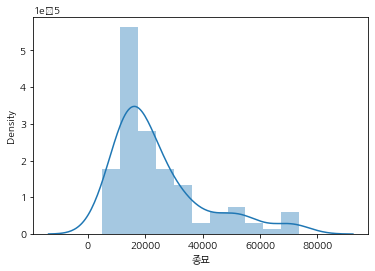

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' 
sns.distplot(a_종묘['종묘'])

In [ ]:
x=a_종묘.drop(['종묘'], axis=1)
y=a_종묘['종묘']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     종묘   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     5.119
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.12e-05
Time:                        09:31:21   Log-Likelihood:                -1176.7
No. Observations:                 108   AIC:                             2373.
Df Residuals:                      98   BIC:                             2400.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.489e+05   1.67e+06     -0.210      0.834   -3.65e+06    2.96e+06
date             1.9820      8.262      0.240      0.811     -14.414      18.378
month         1018.1167    455.272      2.236      0.028     114.644    1921.589
최고 기온(°C)     5849.2915   3708.951      1.577      0.118   -1511.002    1.32e+04
최소 상대습도(%)    -775.7881    812.988     -0.954      0.342   -2389.136     837.560
평균 기온(°C)    -5258.1623   3807.896     -1.381      0.170   -1.28e+04    2298.482
평균 상대습도(%)    -211.1087    776.705     -0.272      0.786   -1752.455    1330.238
일강수량(mm)       273.2447    264.210      1.034      0.304    -251.072     797.561
평균 풍속(m/s)   -5529.5298   4568.120     -1.210      0.229   -1.46e+04    3535.755
합계 일조 시간(hr) -2359.3613   1902.278     -1.240      0.218   -6134.371    1415.648
==============================================================================
Omnibus:                       16.408   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.598
Skew:                           0.944   Prob(JB):                     9.15e-05
Kurtosis:                       3.754   Cond. No.                     2.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
b_종묘.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '종묘'],
      dtype='object')

In [ ]:
c_종묘=b_종묘[['date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)', '0.5m 지중온도(°C)','최저 기온(°C)',
          
          'year','최저 기온 시각(hhmi)','최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', 
       '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',  '풍정합(100m)',
       '최다 풍향(16방위)', '평균 이슬점온도(°C)', '평균 상대습도 시각(hhmi)',
        '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)',  '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '열지수', '종묘']]

In [ ]:
x=c_종묘.drop(['종묘'], axis=1)
y=c_종묘['종묘']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(12,51):
        x1=df.iloc[:, :11]
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

In [ ]:
feature_choice(c_종묘)

[09:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
38,50.0,9761.208532,0.754822
12,24.0,10160.403361,0.734358
30,42.0,10257.266248,0.729269
28,40.0,10300.366611,0.726989
4,16.0,10573.254546,0.712332


In [ ]:
c_종묘.iloc[:, 50]

0      -2
1      21
2      27
3      44
4      58
       ..
103    73
104    66
105    55
106    36
107    21
Name: 열지수, Length: 108, dtype: int64

추가한 칼럼, rmse, test_score

0.5m 지중온도(°C), 10152, 0.73

최저 기온(°C), 9761, 0.7548

최적 칼럼



In [ ]:
c_종묘=b_종묘[['date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)',
          '일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)', '0.5m 지중온도(°C)','최저 기온(°C)','종묘']]

In [ ]:
#c_종묘.to_csv('종묘.csv')

창경궁
--

In [ ]:
b_창경궁.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '창경궁'],
      dtype='object')

In [ ]:
c_창경궁=b_창경궁[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '최대 순간풍속 시각(hhmi)','최저 해면기압 시각(hhmi)',
       '최대 순간풍속 풍향(16방위)','풍정합(100m)',


       'year', '최저 기온 시각(hhmi)',    '열지수',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
         '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)',  '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)',
       '창경궁']]

In [ ]:
x=c_창경궁.drop(['창경궁'], axis=1)
y=c_창경궁['창경궁']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(15,51):
        # 초기값 10, 51
        x1=df.iloc[:, :14]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

In [ ]:
feature_choice(c_창경궁)

[10:06:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
7,22.0,24555.979761,0.684558
6,21.0,24741.064823,0.679785
1,16.0,24800.671891,0.678240
34,49.0,24910.523946,0.675383
18,33.0,24929.881529,0.674878


In [ ]:
c_창경궁.iloc[:, 50]

0      -2
1      21
2      27
3      44
4      58
       ..
103    73
104    66
105    55
106    36
107    21
Name: 열지수, Length: 108, dtype: int64

추가한 칼럼, rmse, test_score

최저 해면기압 시각, 25831, 0.65

최대 순간풍속 시각(hhmi),최저 해면기압 시각(hhmi), 최대 순간풍속 풍향(16방위), 24138, 0.69

풍정합, 24087, 0.6964

In [ ]:
c_창경궁=b_창경궁[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '최대 순간풍속 시각(hhmi)','최저 해면기압 시각(hhmi)',
       '최대 순간풍속 풍향(16방위)','풍정합(100m)','창경궁']]

In [ ]:
#c_창경궁.to_csv('창경궁.csv')

창덕궁
--

In [ ]:
b_창덕궁.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '창덕궁'],
      dtype='object')

In [ ]:
c_창덕궁=b_창덕궁[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','최대 순간풍속 풍향(16방위)', '평균 상대습도 시각(hhmi)', 
       '최대 풍속(m/s)','합계 일사량(MJ/m2)',
       
        'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
        '최대 순간풍속 시각(hhmi)',  '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
      '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', 
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '창덕궁']]

In [ ]:
x=c_창덕궁.drop(['창덕궁'], axis=1)
y=c_창덕궁['창덕궁']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(14,51):
        # 초기값 10, 51
        x1=df.iloc[:, :13]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_창덕궁)

[10:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
36,50.0,32326.470289,0.798544
8,22.0,32326.470289,0.798544
6,20.0,33616.362332,0.782147
35,49.0,33848.757884,0.779124
3,17.0,33963.614818,0.777623


In [ ]:
c_창덕궁.iloc[:, 50]

0      -2
1      21
2      27
3      44
4      58
       ..
103    73
104    66
105    55
106    36
107    21
Name: 열지수, Length: 108, dtype: int64

추가한 칼럼, rmse, test_score

최대 순간풍속 풍향(16방위), 35302, 0.75

평균 상대습도 시각(hhmi), 34504, 0.77

 최대 풍속(m/s), 33188, 0.787660

합계 일사량(MJ/m2), 32326, 0.798544

In [ ]:
c_창덕궁=b_창덕궁[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','최대 순간풍속 풍향(16방위)', '평균 상대습도 시각(hhmi)', 
       '최대 풍속(m/s)','합계 일사량(MJ/m2)','창덕궁']]

In [ ]:
#c_창덕궁.to_csv('창덕궁.csv')

덕수궁
--

In [ ]:
b_덕수궁.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '덕수궁'],
      dtype='object')

In [ ]:
c_덕수궁=b_덕수궁[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)','최대 풍속(m/s)',
       '합계 일사량(MJ/m2)',
       
       
       'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)',  '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', 
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)',  '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '덕수궁']]

In [ ]:
x=c_덕수궁.drop(['덕수궁'], axis=1)
y=c_덕수궁['덕수궁']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(13,51):
        # 초기값 10, 51
        x1=df.iloc[:, :12]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_덕수궁)

[10:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
37,50.0,71999.414767,0.393462
9,22.0,71999.414767,0.393462
12,25.0,72347.416940,0.387585
32,45.0,72636.860904,0.382675
33,46.0,72781.785525,0.380209


In [ ]:
c_덕수궁.iloc[:, 50]

0      -2
1      21
2      27
3      44
4      58
       ..
103    73
104    66
105    55
106    36
107    21
Name: 열지수, Length: 108, dtype: int64

In [ ]:
c_덕수궁=b_덕수궁[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)','최대 풍속(m/s)',
       '합계 일사량(MJ/m2)','덕수궁']]

In [ ]:
c_덕수궁.to_csv('덕수궁.csv')

추가한 칼럼, rmse, test_score

 0.5m 지중온도(°C), 75524.656061, 0.332613

 최대 풍속(m/s), 72976, 0.376890

 합계 일사량(MJ/m2), 71999, 0.393462

서울시립미술관
--

In [ ]:
b_서울시립미술관.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '서울시립미술관 본관'],
      dtype='object')

In [ ]:
c_서울시립미술관=b_서울시립미술관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','평균 해면기압(hPa)','5.0cm 지중온도(°C)',
        '최저 초상온도(°C)', '1시간 최다 일사량(MJ/m2)','9-9강수(mm)','최대 풍속(m/s)', '최저 기온(°C)',
        '평균 30cm 지중온도(°C)', '평균 5cm 지중온도(°C)',
       
        'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)',  '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', 
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
        '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '합계 소형증발량(mm)', '열지수',
       '서울시립미술관 본관']]

In [ ]:
x=c_서울시립미술관.drop(['서울시립미술관 본관'], axis=1)
y=c_서울시립미술관['서울시립미술관 본관']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(19,51):
        # 초기값 10, 51
        x1=df.iloc[:, :18]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_서울시립미술관)

[11:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
31,50.0,45811.434649,0.446460
24,43.0,45811.434649,0.446460
10,29.0,45811.434649,0.446460
14,33.0,46105.658757,0.439327
8,27.0,46307.168974,0.434415


In [ ]:
c_서울시립미술관.iloc[:, 50]

0      -2
1      21
2      27
3      44
4      58
       ..
103    73
104    66
105    55
106    36
107    21
Name: 열지수, Length: 108, dtype: int64

추가한 칼럼명, rmse, test_score

평균 해면기압 49787  0.34

5.0cm 지중온도 48819 0.37

최저 초상온도: 48197, 0.38

1시간 최다 일사량: 47607.9, 0.40

9-9강수(mm): 46921, 0.41 

최대 풍속(m/s): 46705, 0.42

 최저 기온(°C): 46413, 0.43

 평균 30cm 지중온도(°C): 46229.688252, 0.436306

 평균 5cm 지중온도(°C): 45811.434649, 0.446460

In [ ]:
c_서울시립미술관=b_서울시립미술관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','평균 해면기압(hPa)','5.0cm 지중온도(°C)',
        '최저 초상온도(°C)', '1시간 최다 일사량(MJ/m2)','9-9강수(mm)','최대 풍속(m/s)', '최저 기온(°C)',
        '평균 30cm 지중온도(°C)', '평균 5cm 지중온도(°C)','서울시립미술관 본관']]

In [ ]:
#c_서울시립미술관.to_csv('서울시립미술관.csv')

태릉강릉조선왕릉전시관
--

In [ ]:
b_태릉강릉조선왕릉전시관.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '태릉 ·  강릉 · 조선왕릉전시관'],
      dtype='object')

In [ ]:
c_태릉강릉조선왕릉전시관=b_태릉강릉조선왕릉전시관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '최저 기온(°C)','평균 중기압(hPa)','가조시간(hr)',
       '평균 이슬점온도(°C)',
       
       'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', 
       '평균 상대습도 시각(hhmi)',  '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
        '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '태릉 ·  강릉 · 조선왕릉전시관']]

In [ ]:
x=c_태릉강릉조선왕릉전시관.drop(['태릉 ·  강릉 · 조선왕릉전시관'], axis=1)
y=c_태릉강릉조선왕릉전시관['태릉 ·  강릉 · 조선왕릉전시관']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(14,51):
        # 초기값 10, 51
        x1=df.iloc[:, :13]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_태릉강릉조선왕릉전시관)

[11:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
36,50.0,2775.859343,0.822767
9,23.0,2856.164298,0.812365
14,28.0,2897.461814,0.806899
34,48.0,2969.695685,0.797151
3,17.0,2996.381140,0.793489


In [ ]:
c_태릉강릉조선왕릉전시관.iloc[:, 50]

0      -2
1      21
2      27
3      44
4      58
       ..
103    73
104    66
105    55
106    36
107    21
Name: 열지수, Length: 108, dtype: int64

추가한 칼럼명, rmse, test_score

최저 기온(°C), 3380.8942, 0.737

평균 중기압(hPa), 3009, 0.7916

가조시간(hr), 2870.5328, 0.810472

평균 이슬점온도(°C), 2775, 0.822767

In [ ]:
c_태릉강릉조선왕릉전시관=b_태릉강릉조선왕릉전시관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '최저 기온(°C)','평균 중기압(hPa)','가조시간(hr)',
       '평균 이슬점온도(°C)','태릉 ·  강릉 · 조선왕릉전시관']]

In [ ]:
#c_태릉강릉조선왕릉전시관.to_csv('태릉강릉조선왕릉전시관.csv')

서대문자연사박물관
--

In [ ]:
b_서대문자연사박물관.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '서대문자연사박물관'],
      dtype='object')

In [ ]:
c_서대문자연사박물관=b_서대문자연사박물관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '합계 소형증발량(mm)','5.0cm 지중온도(°C)',
       '가조시간(hr)','최대 순간풍속(m/s)','평균 지면온도(°C)', '최대 풍속(m/s)',
       
       'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', 
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)',  '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
        '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '9-9강수(mm)', '열지수',
       '서대문자연사박물관']]

In [ ]:
x=c_서대문자연사박물관.drop(['서대문자연사박물관'], axis=1)
y=c_서대문자연사박물관['서대문자연사박물관']

In [ ]:
ddef feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(16,51):
        # 초기값 10, 51
        x1=df.iloc[:, :15]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_서대문자연사박물관)

[11:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
8,24.0,5710.187952,0.681183
22,38.0,5820.403772,0.668757
21,37.0,5868.631690,0.663245
23,39.0,5898.759505,0.659778
1,17.0,5902.316105,0.659368


In [ ]:
c_서대문자연사박물관.iloc[:, 24]

0      2415.387097
1      2210.250000
2      2950.032258
3      2805.733333
4      2446.709677
          ...     
103    1369.741935
104    1885.166667
105    1841.387097
106    1868.566667
107    1840.193548
Name: 풍정합(100m), Length: 108, dtype: float64

추가한 칼럼명, rmse, test_score

합계 소형증발량(mm), 6166.598693, 0.628181

5.0cm 지중온도(°C), 6072.091309, 0.639490

가조시간(hr), 5974.964088, 0.650931

최대 순간풍속(m/s), 5849.12605, 0.665480

 평균 지면온도(°C), 5784.286144, 0.672855

  최대 풍속(m/s), 5710.187952, 0.681183

In [ ]:
c_서대문자연사박물관=b_서대문자연사박물관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '합계 소형증발량(mm)','5.0cm 지중온도(°C)',
       '가조시간(hr)','최대 순간풍속(m/s)','평균 지면온도(°C)', '최대 풍속(m/s)','서대문자연사박물관']]

In [ ]:
#c_서대문자연사박물관.to_csv('서대문자연사박물관.csv')

헌릉인릉
--

In [ ]:
b_헌릉인릉.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '헌릉ㆍ인릉'],
      dtype='object')

In [ ]:
c_헌릉인릉=b_헌릉인릉[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '평균 중하층운량(10분위)','최대 풍속(m/s)',
       '최고 해면 기압(hPa)', '평균 30cm 지중온도(°C)',  '최저 해면기압(hPa)','평균 5cm 지중온도(°C)',
       
       'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)',  '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', 
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)',  '평균 지면온도(°C)', '최저 초상온도(°C)',
        '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
      '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '헌릉ㆍ인릉']]

In [ ]:
x=c_헌릉인릉.drop([ '헌릉ㆍ인릉'], axis=1)
y=c_헌릉인릉['헌릉ㆍ인릉']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(16,51):
        # 초기값 10, 51
        x1=df.iloc[:, :15]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_헌릉인릉)

[11:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
34,50.0,760.532695,0.863921
9,25.0,760.532695,0.863921
4,20.0,770.903064,0.860185
7,23.0,781.833219,0.856192
14,30.0,782.403981,0.855982


In [ ]:
c_헌릉인릉.iloc[:, 50]

0      -2
1      21
2      27
3      44
4      58
       ..
103    73
104    66
105    55
106    36
107    21
Name: 열지수, Length: 108, dtype: int64

추가한 칼럼명, rmse, test_score

평균 중하층운량(10분위), 844.324260, 0.832285

최대 풍속(m/s), 818.450796, 0.842406

 최고 해면 기압(hPa), 799.419363, 0.849650

 평균 30cm 지중온도(°C), 795.340858, 0.851180

 최저 해면기압(hPa), 767.475081, 0.861426

 평균 5cm 지중온도(°C), 760.532695, 0.863921

In [ ]:
c_헌릉인릉=b_헌릉인릉[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '평균 중하층운량(10분위)','최대 풍속(m/s)',
       '최고 해면 기압(hPa)', '평균 30cm 지중온도(°C)',  '최저 해면기압(hPa)','평균 5cm 지중온도(°C)', '헌릉ㆍ인릉']]

In [ ]:
#c_헌릉인릉.to_csv('헌릉인릉.csv')

선릉정릉
--

In [ ]:
b_선릉정릉.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '선릉·정릉'],
      dtype='object')

In [ ]:
c_선릉정릉=b_선릉정릉[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',  '평균 20cm 지중온도(°C)','0.5m 지중온도(°C)',
        '최대 풍속 풍향(16방위)',
       
       'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)',  '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '선릉·정릉']]

In [ ]:
x=c_선릉정릉.drop(['선릉·정릉'], axis=1)
y=c_선릉정릉['선릉·정릉']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(13,51):
        # 초기값 10, 51
        x1=df.iloc[:, :12]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_선릉정릉)

[16:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
32,45.0,3172.597394,0.931688
23,36.0,3182.533917,0.931259
36,49.0,3187.058170,0.931064
22,35.0,3377.085660,0.922598
30,43.0,3382.176454,0.922364


In [ ]:
c_선릉정릉.iloc[:, 45]

0       8.338710
1       6.150000
2       6.867742
3       9.636667
4      13.383871
         ...    
103    23.790323
104    23.620000
105    21.350000
106    17.180000
107    11.845161
Name: 1.5cm 지중온도(°C), Length: 108, dtype: float64

추가한 칼럼명, rmse, test_score

평균 20cm 지중온도(°C), 3409, 0.921113

 0.5m 지중온도(°C), 3208, 0.930134

 최대 순간풍속 풍향(16방위), 3091.991399, 0.935115 

In [ ]:
c_선릉정릉=b_선릉정릉[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',  '평균 20cm 지중온도(°C)','0.5m 지중온도(°C)',
        '최대 풍속 풍향(16방위)','선릉·정릉']]

In [ ]:
#c_선릉정릉.to_csv('선릉정릉.csv')

남산골 한옥마을
--

In [ ]:
b_남산골한옥마을

,date,month,최고 기온(°C),최소 상대습도(%),평균 기온(°C),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),year,최저 기온 시각(hhmi),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),최저 기온(°C),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),평균 상대습도 시각(hhmi),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),열지수,남산골한옥마을
0,201101,1,-3.406452,35.129032,-7.183871,53.829032,1.112500,2.796774,7.048387,2011,966.290323,1392.838710,4.988750,-10.522581,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2415.387097,229.354839,-15.341935,1230.322581,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,-2,72313
1,201102,2,5.864286,32.000000,1.221429,55.228571,9.700000,2.553571,5.950000,2011,706.785714,1441.535714,12.330000,-2.460714,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2210.250000,190.357143,-7.639286,1390.214286,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,21,135771
2,201103,3,8.345161,25.258065,3.616129,51.112903,2.085714,3.406452,7.748387,2011,1033.548387,1464.419355,4.872857,-0.119355,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,2950.032258,246.451613,-6.654839,1398.032258,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,27,105735
3,201104,4,15.596667,28.666667,10.720000,54.240000,10.009091,3.243333,6.736667,2011,773.433333,1345.500000,7.606364,6.773333,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,2805.733333,226.000000,0.300000,1245.600000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,44,176991
4,201105,5,22.983871,32.161290,17.925806,56.416129,4.107692,2.832258,5.819355,2011,953.387097,1397.129032,7.137692,13.570968,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2446.709677,156.129032,7.900000,1296.290323,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,58,188983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,8,31.635484,44.645161,27.190323,68.516129,12.700000,1.590323,7.976667,2019,696.580645,1468.516129,4.822667,23.590323,7.525806,216.129032,1440.774194,3.819355,239.354839,1544.548387,1369.741935,180.645161,20.354839,1358.548387,24.235484,996.912903,1008.551613,1049.967742,1004.622581,1165.096774,1006.551613,13.600000,1283.333333,2.416000,16.766897,5.632258,3.522581,28.932258,20.964516,27.951613,27.767742,27.219355,27.041935,26.841935,25.222581,23.790323,18.941935,15.316129,5.164516,9.664706,73,73788
104,201909,9,27.100000,44.133333,22.643333,65.270000,10.7538

In [ ]:
x=b_남산골한옥마을.drop(['남산골한옥마을'], axis=1)
y=b_남산골한옥마을['남산골한옥마을']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                남산골한옥마을   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     6.497
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           3.99e-11
Time:                        05:45:05   Log-Likelihood:                -1213.1
No. Observations:                 108   AIC:                             2528.
Df Residuals:                      57   BIC:                             2665.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.082e+07   9.22e+06      1.173      0.246   -7.65e+06    2.93e+07
date                 -64.4737     39.995     -1.612      0.112    -144.563      15.616
month                 16.3331   1630.576      0.010      0.992   -3248.838    3281.505
최고 기온(°C)          -4.944e+04   1.57e+04     -3.151      0.003   -8.09e+04    -1.8e+04
최소 상대습도(%)         -1125.3564   2658.294     -0.423      0.674   -6448.498    4197.785
평균 기온(°C)            1.02e+05    3.8e+04      2.683      0.010    2.59e+04    1.78e+05
평균 상대습도(%)          7801.9037   6905.191      1.130      0.263   -6025.502    2.16e+04
일강수량(mm)            2181.5481   2909.408      0.750      0.456   -3644.441    8007.537
평균 풍속(m/s)          2.945e+05   5.44e+05      0.542      0.590   -7.94e+05    1.38e+06
합계 일조 시간(hr)        5368.2675   8401.246      0.639      0.525   -1.15e+04    2.22e+04
year                  -0.8081     16.257     -0.050      0.961     -33.363      31.747
최저 기온 시각(hhmi)        -3.8687     36.041     -0.107      0.915     -76.040      68.303
최고 기온 시각(hhmi)       -30.1463     55.957     -0.539      0.592    -142.199      81.906
1시간 최다강수량 시각(hhmi)  1773.8698   2561.991      0.692      0.492   -3356.429    6904.169
최저 기온(°C)          -2.896e+04    2.2e+04     -1.315      0.194    -7.3e+04    1.51e+04
최대 순간풍속(m/s)        9589.6452   1.29e+04      0.741      0.462   -1.63e+04    3.55e+04
최대 순간풍속 풍향(16방위)      59.8993    274.130      0.219      0.828    -489.037     608.835
최대 순간풍속 시각(hhmi)     -33.5110     49.789     -0.673      0.504    -133.212      66.190
최대 풍속(m/s)         -6103.8896   2.95e+04     -0.207      0.837   -6.52e+04     5.3e+04
최대 풍속 풍향(16방위)       -76.3736    355.739     -0.215      0.831    -788.730     635.982
최대 풍속 시각(hhmi)        41.7817     53.176      0.786      0.435     -64.702     148.266
풍정합(100m)           -365.0319    630.314     -0.579      0.565   -1627.214     897.150
최다 풍향(16방위)          172.3162    158.457      1.087      0.281    -144.989     489.622
평균 이슬점온도(°C)       -1.454e+04   2.41e+04     -0.602      0.549   -6.29e+04    3.38e+04
평균 상대습도 시각(hhmi)      47.4275     52.014      0.912      0.366     -56.728     151.583
평균 중기압(hPa)        -1.032e+04   9178.283     -1.125      0.265   -2.87e+04    8056.486
평균 현지기압(hPa)        2.757e+05   3.25e+05      0.848      0.400   -3.75e+05    9.27e+05
최고 해면 기압(hPa)       8089.8507   2.23e+04      0.362      0.718   -3.66e+04    5.28e+04
최고 해면기압 시각(hhmi)       3.3782     33.776      0.100      0.921     -64.258      71.014
최저 해면기압(hPa)        6840.6533   1.83e+04      0.374      0.710   -2.98e+04    4.35e+04
최저 해면기압 시각(hhmi)     -24.2062     34.683     -0.698      0.488     -93.657      45.245
평균 해면기압(hPa)       -2.868e+05   3.24e+05     -0.887      0.379   -9.35e+05    3.61e+05
가조시간(hr)            3.638e+04   2.19e+

In [ ]:
p_values_1=pd.DataFrame(lin_reg.pvalues, columns=['p-value'])
p_values_1=p_values_1.sort_values(by='p-value', ascending=True)
p_values_1.loc[p_values_1['p-value']<0.05]

,p-value
최고 기온(°C),0.002589
합계 일사량(MJ/m2),0.002924
1시간 최다 일사량(MJ/m2),0.003398
평균 기온(°C),0.009540
최저 초상온도(°C),0.020120
0.5m 지중온도(°C),0.048852


In [ ]:
vif = pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features']=x.columns
vif=vif.sort_values(by='VIF Factor', ascending=True)

In [ ]:
vif.loc[vif['VIF Factor']<10] # VIF가 일반적으로 10이상이면 다중공선성으로 본다.

,VIF Factor,features


In [ ]:
p10=p_values_1.sort_values(by='p-value', ascending=True).head(10)
p10

,p-value
최고 기온(°C),0.002589
합계 일사량(MJ/m2),0.002924
1시간 최다 일사량(MJ/m2),0.003398
평균 기온(°C),0.009540
최저 초상온도(°C),0.020120
0.5m 지중온도(°C),0.048852
1.5cm 지중온도(°C),0.051090
평균 5cm 지중온도(°C),0.052934
평균 30cm 지중온도(°C),0.097412
가조시간(hr),0.101518


In [ ]:
v10=vif.sort_values(by='VIF Factor', ascending=True).head(10)
v10v10=vif.sort_values(by='VIF Factor', ascending=True).head(10)
v10

,VIF Factor,features
12,39.352673,1시간 최다강수량 시각(hhmi)
6,132.458787,일강수량(mm)
49,138.792143,9-9강수(mm)
21,159.122447,최다 풍향(16방위)
48,170.297689,합계 소형증발량(mm)
10,178.186727,최저 기온 시각(hhmi)
36,235.289604,평균 중하층운량(10분위)
27,252.863058,최고 해면기압 시각(hhmi)
29,330.779169,최저 해면기압 시각(hhmi)
35,495.630120,평균 전운량(10분위)


ver1에 VIF, p-value가 가장 낮은 칼럼들 10개씩 을 부여하고 돌려보기
--

In [ ]:
c_남산골한옥마을=b_남산골한옥마을[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       
      '1시간 최다강수량 시각(hhmi)', '9-9강수(mm)', '최다 풍향(16방위)','합계 소형증발량(mm)',
     '최저 기온 시각(hhmi)','평균 중하층운량(10분위)', '최고 해면기압 시각(hhmi)',
      '최저 해면기압 시각(hhmi)','평균 전운량(10분위)','합계 일사량(MJ/m2)','1시간 최다 일사량(MJ/m2)',
      '최저 초상온도(°C)','0.5m 지중온도(°C)', '1.5cm 지중온도(°C)', '평균 5cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '가조시간(hr)','남산골한옥마을']]

In [ ]:
x=c_남산골한옥마을.drop(['남산골한옥마을'], axis=1)
y=c_남산골한옥마을['남산골한옥마을']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                남산골한옥마을   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     9.855
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           7.81e-16
Time:                        05:39:51   Log-Likelihood:                -1238.8
No. Observations:                 108   AIC:                             2532.
Df Residuals:                      81   BIC:                             2604.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.427e+07    4.5e+06      5.399      0.000    1.53e+07    3.32e+07
date                -121.9354     22.411     -5.441      0.000    -166.527     -77.344
month                674.5249   1455.597      0.463      0.644   -2221.656    3570.706
최고 기온(°C)          -5403.4884   9688.141     -0.558      0.579   -2.47e+04    1.39e+04
최소 상대습도(%)         -2370.6675   1998.691     -1.186      0.239   -6347.435    1606.100
평균 기온(°C)           2.483e+04   1.17e+04      2.123      0.037    1554.847    4.81e+04
평균 상대습도(%)          2911.0801   1978.044      1.472      0.145   -1024.608    6846.768
일강수량(mm)           -1356.4875   2453.072     -0.553      0.582   -6237.332    3524.357
평균 풍속(m/s)          -1.56e+04   1.15e+04     -1.354      0.179   -3.85e+04    7315.567
합계 일조 시간(hr)        1.118e+04   7621.900      1.466      0.146   -3989.240    2.63e+04
1시간 최다강수량 시각(hhmi)  3594.7654   2212.325      1.625      0.108    -807.067    7996.597
9-9강수(mm)            973.7126   2476.263      0.393      0.695   -3953.274    5900.699
최다 풍향(16방위)           82.2307    103.037      0.798      0.427    -122.780     287.241
합계 소형증발량(mm)        1.269e+04   6268.578      2.025      0.046     219.060    2.52e+04
최저 기온 시각(hhmi)        48.1289     29.344      1.640      0.105     -10.257     106.515
평균 중하층운량(10분위)     -7207.9321   8907.266     -0.809      0.421   -2.49e+04    1.05e+04
최고 해면기압 시각(hhmi)      25.2193     29.779      0.847      0.400     -34.031      84.470
최저 해면기압 시각(hhmi)     -37.4205     32.700     -1.144      0.256    -102.484      27.643
평균 전운량(10분위)        1.814e+04   9135.036      1.986      0.050     -37.000    3.63e+04
합계 일사량(MJ/m2)      -2.191e+04   7877.123     -2.781      0.007   -3.76e+04   -6233.581
1시간 최다 일사량(MJ/m2)   1.208e+05   4.71e+04      2.564      0.012    2.71e+04    2.15e+05
최저 초상온도(°C)        -1.807e+04   3970.400     -4.550      0.000    -2.6e+04   -1.02e+04
0.5m 지중온도(°C)      -1.208e+04   8461.751     -1.427      0.157   -2.89e+04    4759.219
1.5cm 지중온도(°C)     -6447.6739   4993.162     -1.291      0.200   -1.64e+04    3487.152
평균 5cm 지중온도(°C)    -1.391e+04   8446.575     -1.647      0.104   -3.07e+04    2898.653
평균 30cm 지중온도(°C)    3.206e+04   7516.019      4.266      0.000    1.71e+04     4.7e+04
가조시간(hr)            3969.7701    1.3e+04      0.305      0.761   -2.19e+04    2.98e+04
==============================================================================
Omnibus:                        0.874   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.532
Skew:                           0.156   Prob(JB):                        0.767
Kurtosis:                       3.144   Cond. No.                     3.52e+08
==============================================================================

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[05:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.998
rmse 점수는 20391.93785131974 입니다.
r2 점수는 0.74 입니다.
test 스코어는 0.7422101275846333 입니다.


모든 칼럼 부여했을 때,

XGboosting train 점수는 0.996

rmse 점수는 22452.61803856131 입니다.

r2 점수는 0.69 입니다.

test 스코어는 0.6874763913670736 입니다.

vif, p-value기준 낮은 칼럼 10개씩 부여했을 때

XGboosting train 점수는 0.998

rmse 점수는 20391.93785131974 입니다.

r2 점수는 0.74 입니다.

test 스코어는 0.7422101275846333 입니다.

- 다중공선성 문제가 어느정도 잡힌 것을 볼 수 있다.

p-value, vif 낮은 칼럼 5개씩 부여
--

In [ ]:
p10.index

Index(['최고 기온(°C)', '합계 일사량(MJ/m2)', '1시간 최다 일사량(MJ/m2)', '평균 기온(°C)',
       '최저 초상온도(°C)', '0.5m 지중온도(°C)', '1.5cm 지중온도(°C)', '평균 5cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '가조시간(hr)'],
      dtype='object')

In [ ]:
v10.features.unique()

array(['1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '9-9강수(mm)', '최다 풍향(16방위)',
       '합계 소형증발량(mm)', '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)'],
      dtype=object)

In [ ]:
c_남산골한옥마을=b_남산골한옥마을[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       
      '1시간 최다강수량 시각(hhmi)', '9-9강수(mm)', '최다 풍향(16방위)','합계 소형증발량(mm)',
      
    '합계 일사량(MJ/m2)','1시간 최다 일사량(MJ/m2)',
      '최저 초상온도(°C)','남산골한옥마을']]

In [ ]:
x=c_남산골한옥마을.drop(['남산골한옥마을'], axis=1)
y=c_남산골한옥마을['남산골한옥마을']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                남산골한옥마을   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     11.40
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.66e-15
Time:                        05:47:12   Log-Likelihood:                -1256.4
No. Observations:                 108   AIC:                             2547.
Df Residuals:                      91   BIC:                             2592.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.157e+07   4.28e+06      5.037      0.000    1.31e+07    3.01e+07
date                -107.6081     21.265     -5.060      0.000    -149.849     -65.368
month               1981.6530   1216.890      1.628      0.107    -435.549    4398.855
최고 기온(°C)          -3273.8411   9306.265     -0.352      0.726   -2.18e+04    1.52e+04
최소 상대습도(%)         -5009.3884   1968.163     -2.545      0.013   -8918.903   -1099.874
평균 기온(°C)           1.756e+04   1.15e+04      1.529      0.130   -5246.696    4.04e+04
평균 상대습도(%)          4136.4251   2016.770      2.051      0.043     130.359    8142.491
일강수량(mm)           -2006.9728   2520.293     -0.796      0.428   -7013.224    2999.279
평균 풍속(m/s)          -376.7664   1.12e+04     -0.034      0.973   -2.27e+04    2.19e+04
합계 일조 시간(hr)       -5138.2993   5126.776     -1.002      0.319   -1.53e+04    5045.412
1시간 최다강수량 시각(hhmi)  4336.9711   2131.754      2.034      0.045     102.504    8571.438
9-9강수(mm)           2245.8696   2514.079      0.893      0.374   -2748.039    7239.779
최다 풍향(16방위)           97.8386    110.038      0.889      0.376    -120.739     316.416
합계 소형증발량(mm)        2.242e+04   6387.407      3.511      0.001    9735.569    3.51e+04
합계 일사량(MJ/m2)      -1.903e+04   5598.817     -3.398      0.001   -3.01e+04   -7905.904
1시간 최다 일사량(MJ/m2)   1.078e+05   4.22e+04      2.558      0.012    2.41e+04    1.92e+05
최저 초상온도(°C)         -1.22e+04   3820.101     -3.194      0.002   -1.98e+04   -4613.807
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.729
Skew:                           0.302   Prob(JB):                        0.421
Kurtosis:                       3.139   Cond. No.                     3.02e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[05:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.998
rmse 점수는 19202.94396002874 입니다.
r2 점수는 0.77 입니다.
test 스코어는 0.7713956538068525 입니다.


vif, p-value를 5개씩만 부여했을 때, 점수가 더 올라간 것을 확인 할 수 있다.

In [ ]:
c_남산골한옥마을

,date,month,최고 기온(°C),최소 상대습도(%),평균 기온(°C),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),1시간 최다강수량 시각(hhmi),9-9강수(mm),최다 풍향(16방위),합계 소형증발량(mm),합계 일사량(MJ/m2),1시간 최다 일사량(MJ/m2),최저 초상온도(°C),남산골한옥마을
0,201101,1,-3.406452,35.129032,-7.183871,53.829032,1.112500,2.796774,7.048387,4.988750,0.741667,229.354839,1.209677,9.951290,1.791935,-16.083871,72313
1,201102,2,5.864286,32.000000,1.221429,55.228571,9.700000,2.553571,5.950000,12.330000,7.850000,190.357143,1.803571,10.827857,1.841786,-9.564286,135771
2,201103,3,8.345161,25.258065,3.616129,51.112903,2.085714,3.406452,7.748387,4.872857,1.537500,246.451613,2.958065,16.342258,2.541290,-5.006452,105735
3,201104,4,15.596667,28.666667,10.720000,54.240000,10.009091,3.243333,6.736667,7.606364,7.346667,226.000000,3.756667,16.832333,2.452333,1.116667,176991
4,201105,5,22.983871,32.161290,17.925806,56.416129,4.107692,2.832258,5.819355,7.137692,5.278571,156.129032,4.341935,17.091935,2.402258,8.935484,188983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,8,31.635484,44.645161,27.190323,68.516129,12.700000,1.590323,7.976667,4.822667,9.664706,180.645161,5.164516,16.766897,2.416000,20.964516,73788
104,201909,9,27.100000,44.133333,22.643333,65.270000,10.753846,2.183333,5.630000,7.473846,10.753846,320.333333,4.436667,12.892667,2.101667,15.393333,142530
105,201910,10,21.767742,38.935484,16.370968,62.164516,7.928571,2.129032,7.629032,6.810000,6.937500,276.774194,3.909677,12.755806,2.087419,6.974194,163316
106,201911,11,12.933333,33.133333,7.580000,55.900000,9.850000,2.166667,6.773333,6.653750,9.862500,182.666667,2.736667,9.476000,1.678333,-1.133333,125777


최적 변수 찾기
--

In [ ]:
c_남산골한옥마을=b_남산골한옥마을[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','합계 소형증발량(mm)','최저 초상온도(°C)','최다 풍향(16방위)',
       '9-9강수(mm)', 
       
      '1시간 최다강수량 시각(hhmi)', 
    '합계 일사량(MJ/m2)','1시간 최다 일사량(MJ/m2)',
      '남산골한옥마을']]

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(14,16):
        # 초기값 10, 51
        x1=df.iloc[:, :13]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_남산골한옥마을)

[05:57:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,변수,rmse,test_score
0,14.0,17477.053607,0.810641
1,15.0,19375.266263,0.767274


In [ ]:
c_남산골한옥마을.iloc[:, 14]

0       9.951290
1      10.827857
2      16.342258
3      16.832333
4      17.091935
         ...    
103    16.766897
104    12.892667
105    12.755806
106     9.476000
107     7.201613
Name: 합계 일사량(MJ/m2), Length: 108, dtype: float64

추가한 칼럼명, rmse, test_score

합계 소형증발량(mm), 20346.240847, 0.743364

최저 초상온도(°C), 18091.823573, 0.797085

최다 풍향(16방위), 17588.892473, 0.808210

9-9강수(mm), 16915.043724, 0.822624

In [ ]:
c_남산골한옥마을=b_남산골한옥마을[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','합계 소형증발량(mm)','최저 초상온도(°C)','최다 풍향(16방위)',
       '9-9강수(mm)', '남산골한옥마을']]

In [ ]:
#c_남산골한옥마을.to_csv('남산골한옥마을.csv')

In [ ]:
c_남산골한옥마을.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '합계 소형증발량(mm)', '최저 초상온도(°C)',
       '최다 풍향(16방위)', '9-9강수(mm)', '남산골한옥마을'],
      dtype='object')

서대문형무소역사관
--

In [ ]:
b_서대문형무소역사관

,date,month,최고 기온(°C),최소 상대습도(%),평균 기온(°C),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),year,최저 기온 시각(hhmi),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),최저 기온(°C),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),평균 상대습도 시각(hhmi),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),열지수,서대문형무소역사관
0,201101,1,-3.406452,35.129032,-7.183871,53.829032,1.112500,2.796774,7.048387,2011,966.290323,1392.838710,4.988750,-10.522581,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2415.387097,229.354839,-15.341935,1230.322581,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,-2,18407
1,201102,2,5.864286,32.000000,1.221429,55.228571,9.700000,2.553571,5.950000,2011,706.785714,1441.535714,12.330000,-2.460714,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2210.250000,190.357143,-7.639286,1390.214286,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,21,14387
2,201103,3,8.345161,25.258065,3.616129,51.112903,2.085714,3.406452,7.748387,2011,1033.548387,1464.419355,4.872857,-0.119355,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,2950.032258,246.451613,-6.654839,1398.032258,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,27,47554
3,201104,4,15.596667,28.666667,10.720000,54.240000,10.009091,3.243333,6.736667,2011,773.433333,1345.500000,7.606364,6.773333,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,2805.733333,226.000000,0.300000,1245.600000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,44,66009
4,201105,5,22.983871,32.161290,17.925806,56.416129,4.107692,2.832258,5.819355,2011,953.387097,1397.129032,7.137692,13.570968,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2446.709677,156.129032,7.900000,1296.290323,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,58,72267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,8,31.635484,44.645161,27.190323,68.516129,12.700000,1.590323,7.976667,2019,696.580645,1468.516129,4.822667,23.590323,7.525806,216.129032,1440.774194,3.819355,239.354839,1544.548387,1369.741935,180.645161,20.354839,1358.548387,24.235484,996.912903,1008.551613,1049.967742,1004.622581,1165.096774,1006.551613,13.600000,1283.333333,2.416000,16.766897,5.632258,3.522581,28.932258,20.964516,27.951613,27.767742,27.219355,27.041935,26.841935,25.222581,23.790323,18.941935,15.316129,5.164516,9.664706,73,106315
104,201909,9,27.100000,44.133333,22.643333,65.270000,10.75384

In [ ]:
x=b_서대문형무소역사관.drop(['서대문형무소역사관'], axis=1)
y=b_서대문형무소역사관['서대문형무소역사관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문형무소역사관   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     2.705
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           0.000167
Time:                        06:27:09   Log-Likelihood:                -1201.4
No. Observations:                 108   AIC:                             2505.
Df Residuals:                      57   BIC:                             2642.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.644e+05   8.28e+06     -0.104      0.917   -1.74e+07    1.57e+07
date                   6.7889     35.890      0.189      0.851     -65.080      78.658
month                241.4115   1463.209      0.165      0.870   -2688.614    3171.437
최고 기온(°C)          -1.247e+04   1.41e+04     -0.886      0.379   -4.07e+04    1.57e+04
최소 상대습도(%)          1258.8944   2385.440      0.528      0.600   -3517.866    6035.655
평균 기온(°C)           6.313e+04   3.41e+04      1.850      0.069   -5199.553    1.31e+05
평균 상대습도(%)          1.266e+04   6196.424      2.043      0.046     250.126    2.51e+04
일강수량(mm)            1273.9720   2610.778      0.488      0.627   -3954.022    6501.966
평균 풍속(m/s)          4.334e+05   4.88e+05      0.888      0.378   -5.44e+05    1.41e+06
합계 일조 시간(hr)        3700.1057   7538.919      0.491      0.625   -1.14e+04    1.88e+04
year                  -2.3462     14.589     -0.161      0.873     -31.560      26.867
최저 기온 시각(hhmi)        29.7572     32.342      0.920      0.361     -35.006      94.521
최고 기온 시각(hhmi)       -23.3852     50.214     -0.466      0.643    -123.936      77.166
1시간 최다강수량 시각(hhmi) -1981.8188   2299.022     -0.862      0.392   -6585.530    2621.893
최저 기온(°C)          -9813.5959   1.98e+04     -0.497      0.621   -4.94e+04    2.98e+04
최대 순간풍속(m/s)       -8877.8271   1.16e+04     -0.765      0.448   -3.21e+04    1.44e+04
최대 순간풍속 풍향(16방위)      69.2407    245.993      0.281      0.779    -423.351     561.832
최대 순간풍속 시각(hhmi)      63.5117     44.679      1.422      0.161     -25.956     152.979
최대 풍속(m/s)          1.148e+04   2.65e+04      0.434      0.666   -4.15e+04    6.45e+04
최대 풍속 풍향(16방위)      -106.8333    319.225     -0.335      0.739    -746.071     532.405
최대 풍속 시각(hhmi)       -64.9137     47.718     -1.360      0.179    -160.468      30.641
풍정합(100m)           -503.0922    565.617     -0.889      0.377   -1635.721     629.536
최다 풍향(16방위)          183.9259    142.193      1.293      0.201    -100.810     468.662
평균 이슬점온도(°C)       -4.465e+04   2.17e+04     -2.061      0.044    -8.8e+04   -1268.394
평균 상대습도 시각(hhmi)      87.7875     46.675      1.881      0.065      -5.677     181.252
평균 중기압(hPa)         1701.9610   8236.199      0.207      0.837   -1.48e+04    1.82e+04
평균 현지기압(hPa)        6.004e+05   2.92e+05      2.058      0.044    1.62e+04    1.18e+06
최고 해면 기압(hPa)       2888.7521      2e+04      0.144      0.886   -3.72e+04     4.3e+04
최고 해면기압 시각(hhmi)     -42.1022     30.309     -1.389      0.170    -102.796      18.591
최저 해면기압(hPa)        1169.5600   1.64e+04      0.071      0.943   -3.17e+04     3.4e+04
최저 해면기압 시각(hhmi)       2.3742     31.123      0.076      0.939     -59.948      64.697
평균 해면기압(hPa)       -5.992e+05    2.9e+05     -2.064      0.044   -1.18e+06   -1.79e+04
가조시간(hr)           -2.225e+04   1.96e+

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[06:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.997
rmse 점수는 18342.714284855858 입니다.
r2 점수는 0.55 입니다.
test 스코어는 0.5506929591169059 입니다.


In [ ]:
p_values_1=pd.DataFrame(lin_reg.pvalues, columns=['p-value'])
p_values_1=p_values_1.sort_values(by='p-value', ascending=True)
p_values_1.loc[p_values_1['p-value']<0.05]

,p-value
평균 지면온도(°C),0.018343
평균 해면기압(hPa),0.043578
평균 이슬점온도(°C),0.043874
평균 현지기압(hPa),0.044175
평균 상대습도(%),0.045703


In [ ]:
vif = pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features']=x.columns
vif=vif.sort_values(by='VIF Factor', ascending=True)

In [ ]:
vif.loc[vif['VIF Factor']<10] # VIF가 일반적으로 10이상이면 다중공선성으로 본다.

,VIF Factor,features


In [ ]:
p10=p_values_1.sort_values(by='p-value', ascending=True).head(10)

In [ ]:
p15=p_values_1.sort_values(by='p-value', ascending=True).head(15)

In [ ]:
p20=p_values_1.sort_values(by='p-value', ascending=True).head(20)
p20

,p-value
평균 지면온도(°C),0.018343
평균 해면기압(hPa),0.043578
평균 이슬점온도(°C),0.043874
평균 현지기압(hPa),0.044175
평균 상대습도(%),0.045703
평균 상대습도 시각(hhmi),0.065107
합계 소형증발량(mm),0.069327
평균 기온(°C),0.069487
최대 순간풍속 시각(hhmi),0.160614
평균 중하층운량(10분위),0.169851


In [ ]:
v10=vif.sort_values(by='VIF Factor', ascending=True).head(10)

In [ ]:
v15=vif.sort_values(by='VIF Factor', ascending=True).head(15)

In [ ]:
v20=vif.sort_values(by='VIF Factor', ascending=True).head(20)
v20

,VIF Factor,features
12,39.352673,1시간 최다강수량 시각(hhmi)
6,132.458787,일강수량(mm)
49,138.792143,9-9강수(mm)
21,159.122447,최다 풍향(16방위)
48,170.297689,합계 소형증발량(mm)
10,178.186727,최저 기온 시각(hhmi)
36,235.289604,평균 중하층운량(10분위)
27,252.863058,최고 해면기압 시각(hhmi)
29,330.779169,최저 해면기압 시각(hhmi)
35,495.630120,평균 전운량(10분위)


ver_a에 VIF, p-value가 가장 낮은 칼럼들 10개씩 을 부여하고 돌려보기
--

In [ ]:
p10.index

Index(['평균 지면온도(°C)', '평균 해면기압(hPa)', '평균 이슬점온도(°C)', '평균 현지기압(hPa)',
       '평균 상대습도(%)', '평균 상대습도 시각(hhmi)', '합계 소형증발량(mm)', '평균 기온(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 중하층운량(10분위)'],
      dtype='object')

In [ ]:
v10.features.unique()

array(['1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '9-9강수(mm)', '최다 풍향(16방위)',
       '합계 소형증발량(mm)', '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)'],
      dtype=object)

In [ ]:
b_서대문형무소역사관.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '서대문형무소역사관'],
      dtype='object')

In [ ]:
c_서대문형무소역사관=b_서대문형무소역사관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',

       '평균 지면온도(°C)', '평균 해면기압(hPa)', '평균 이슬점온도(°C)', '평균 현지기압(hPa)',
       '평균 상대습도 시각(hhmi)', '합계 소형증발량(mm)',
       '최대 순간풍속 시각(hhmi)', '평균 중하층운량(10분위)',

       '1시간 최다강수량 시각(hhmi)', '9-9강수(mm)', '최다 풍향(16방위)',
       '최저 기온 시각(hhmi)', 
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',

       '서대문형무소역사관']]

In [ ]:
x=c_서대문형무소역사관.drop(['서대문형무소역사관'], axis=1)
y=c_서대문형무소역사관['서대문형무소역사관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문형무소역사관   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     4.251
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           4.36e-07
Time:                        06:18:34   Log-Likelihood:                -1223.8
No. Observations:                 108   AIC:                             2498.
Df Residuals:                      83   BIC:                             2565.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.657e+06   4.26e+06     -1.329      0.187   -1.41e+07    2.81e+06
date                  27.1562     19.788      1.372      0.174     -12.202      66.514
month                253.4845   1021.912      0.248      0.805   -1779.057    2286.026
최고 기온(°C)          -4097.7081   8072.438     -0.508      0.613   -2.02e+04     1.2e+04
최소 상대습도(%)           953.0022   1719.351      0.554      0.581   -2466.717    4372.721
평균 기온(°C)           2.095e+04   2.12e+04      0.986      0.327   -2.13e+04    6.32e+04
평균 상대습도(%)          7824.1176   4520.915      1.731      0.087   -1167.801    1.68e+04
일강수량(mm)            3015.0225   2102.049      1.434      0.155   -1165.868    7195.913
평균 풍속(m/s)          8723.7721   1.01e+04      0.867      0.388   -1.13e+04    2.87e+04
합계 일조 시간(hr)       -4236.7718   5422.462     -0.781      0.437    -1.5e+04    6548.286
평균 지면온도(°C)        -7273.1254   3509.501     -2.072      0.041   -1.43e+04    -292.870
평균 해면기압(hPa)       -4.299e+05   1.88e+05     -2.285      0.025   -8.04e+05   -5.57e+04
평균 이슬점온도(°C)       -2.753e+04   1.55e+04     -1.779      0.079   -5.83e+04    3254.773
평균 현지기압(hPa)         4.34e+05    1.9e+05      2.284      0.025    5.61e+04    8.12e+05
평균 상대습도 시각(hhmi)      47.7038     39.493      1.208      0.231     -30.847     126.255
합계 소형증발량(mm)        1.134e+04   4762.563      2.382      0.020    1869.924    2.08e+04
최대 순간풍속 시각(hhmi)      -3.7813     31.867     -0.119      0.906     -67.163      59.600
평균 중하층운량(10분위)     -8717.1881   7688.011     -1.134      0.260    -2.4e+04    6573.957
1시간 최다강수량 시각(hhmi) -2982.5339   1792.526     -1.664      0.100   -6547.797     582.729
9-9강수(mm)          -4423.2403   2072.022     -2.135      0.036   -8544.408    -302.073
최다 풍향(16방위)           98.1326     86.834      1.130      0.262     -74.576     270.842
최저 기온 시각(hhmi)        26.9078     25.180      1.069      0.288     -23.175      76.991
최고 해면기압 시각(hhmi)     -36.9376     24.497     -1.508      0.135     -85.660      11.785
최저 해면기압 시각(hhmi)      11.2173     27.073      0.414      0.680     -42.629      65.064
평균 전운량(10분위)       -2936.9819   7374.077     -0.398      0.691   -1.76e+04    1.17e+04
==============================================================================
Omnibus:                        3.734   Durbin-Watson:                   2.382
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.336
Skew:                           0.427   Prob(JB):                        0.189
Kurtosis:                       3.102   Cond. No.                     3.87e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+08. This might indicate that 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[06:18:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.994
rmse 점수는 19651.647401626196 입니다.
r2 점수는 0.48 입니다.
test 스코어는 0.4842800307681061 입니다.


모든 칼럼 부여

rmse 점수는 18342.714284855858 입니다.

r2 점수는 0.55 입니다.

test 스코어는 0.5506929591169059 입니다.

p-value, vif 낮은 10개 칼럼 부여

rmse 점수는 19651.647401626196 입니다.

r2 점수는 0.48 입니다.

test 스코어는 0.4842800307681061 입니다.

오히려 떨어진 것을 볼 수 있다.

ver_a에 VIF, p-value가 가장 낮은 칼럼들 15개씩 을 부여하고 돌려보기
--

In [ ]:
p15.index

Index(['평균 지면온도(°C)', '평균 해면기압(hPa)', '평균 이슬점온도(°C)', '평균 현지기압(hPa)',
       '평균 상대습도(%)', '평균 상대습도 시각(hhmi)', '합계 소형증발량(mm)', '평균 기온(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 중하층운량(10분위)', '최고 해면기압 시각(hhmi)',
       '최대 풍속 시각(hhmi)', '최다 풍향(16방위)', '3.0cm 지중온도(°C)', '가조시간(hr)'],
      dtype='object')

In [ ]:
v15.features.unique()

array(['1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '9-9강수(mm)', '최다 풍향(16방위)',
       '합계 소형증발량(mm)', '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',
       '합계 일조 시간(hr)', '최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',
       '평균 상대습도 시각(hhmi)', '최대 순간풍속 시각(hhmi)'], dtype=object)

In [ ]:
c_서대문형무소역사관=b_서대문형무소역사관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',

       '평균 지면온도(°C)', '평균 해면기압(hPa)', '평균 이슬점온도(°C)', '평균 현지기압(hPa)',
       '평균 상대습도 시각(hhmi)', '합계 소형증발량(mm)',
       '최대 순간풍속 시각(hhmi)', '평균 중하층운량(10분위)',

       '최고 해면기압 시각(hhmi)',
       '최대 풍속 시각(hhmi)', '최다 풍향(16방위)', '3.0cm 지중온도(°C)', '가조시간(hr)',

       '1시간 최다강수량 시각(hhmi)', '9-9강수(mm)', 
       '최저 기온 시각(hhmi)', 
        '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',

    '최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',


       '서대문형무소역사관']]

In [ ]:
x=c_서대문형무소역사관.drop(['서대문형무소역사관'], axis=1)
y=c_서대문형무소역사관['서대문형무소역사관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문형무소역사관   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     3.482
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           6.29e-06
Time:                        06:24:37   Log-Likelihood:                -1222.2
No. Observations:                 108   AIC:                             2504.
Df Residuals:                      78   BIC:                             2585.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.652e+06   4.87e+06     -0.751      0.455   -1.33e+07    6.03e+06
date                  23.1130     20.694      1.117      0.267     -18.087      64.313
month                346.6388   1295.215      0.268      0.790   -2231.937    2925.214
최고 기온(°C)          -5026.9277   8530.991     -0.589      0.557    -2.2e+04     1.2e+04
최소 상대습도(%)          1431.9749   1822.882      0.786      0.435   -2197.105    5061.054
평균 기온(°C)           1.764e+04   2.21e+04      0.797      0.428   -2.64e+04    6.17e+04
평균 상대습도(%)          6273.2837   5171.863      1.213      0.229   -4023.105    1.66e+04
일강수량(mm)            3136.5823   2194.055      1.430      0.157   -1231.445    7504.610
평균 풍속(m/s)          8061.8016   1.08e+04      0.747      0.457   -1.34e+04    2.95e+04
합계 일조 시간(hr)       -3750.5056   5625.194     -0.667      0.507   -1.49e+04    7448.396
평균 지면온도(°C)        -5246.2796   4036.281     -1.300      0.198   -1.33e+04    2789.339
평균 해면기압(hPa)       -4.589e+05   2.13e+05     -2.154      0.034   -8.83e+05   -3.48e+04
평균 이슬점온도(°C)       -2.317e+04   1.79e+04     -1.294      0.199   -5.88e+04    1.25e+04
평균 현지기압(hPa)        4.624e+05   2.15e+05      2.151      0.035    3.45e+04     8.9e+05
평균 상대습도 시각(hhmi)      56.9416     41.257      1.380      0.171     -25.195     139.078
합계 소형증발량(mm)        1.096e+04   5070.701      2.162      0.034     869.332    2.11e+04
최대 순간풍속 시각(hhmi)      14.2152     39.218      0.362      0.718     -63.861      92.292
평균 중하층운량(10분위)     -9107.3699   8164.495     -1.115      0.268   -2.54e+04    7146.892
최고 해면기압 시각(hhmi)     -31.5814     25.925     -1.218      0.227     -83.195      20.032
최대 풍속 시각(hhmi)       -28.2222     37.560     -0.751      0.455    -102.998      46.553
최다 풍향(16방위)           90.4900    115.167      0.786      0.434    -138.790     319.769
3.0cm 지중온도(°C)     -3483.3822   3175.973     -1.097      0.276   -9806.259    2839.494
가조시간(hr)           -1.456e+04   1.21e+04     -1.207      0.231   -3.86e+04    9456.307
1시간 최다강수량 시각(hhmi) -3241.2394   1887.806     -1.717      0.090   -6999.573     517.094
9-9강수(mm)          -4159.2374   2189.659     -1.899      0.061   -8518.515     200.040
최저 기온 시각(hhmi)        31.5913     26.708      1.183      0.240     -21.579      84.762
최저 해면기압 시각(hhmi)      11.6555     28.138      0.414      0.680     -44.363      67.674
평균 전운량(10분위)       -1439.3328   8067.056     -0.178      0.859   -1.75e+04    1.46e+04
최저 초상온도(°C)        -1078.3709   3812.244     -0.283      0.778   -8667.965    6511.224
최대 순간풍속 풍향(16방위)      53.6194    154.667      0.347      0.730    -254.300     361.539
==============================================================================
Omnibus:                        3.904   Durbin-Watson:                   2.363
Prob(Omnibus):                  0.142   Jarque-Bera (J

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[06:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.995
rmse 점수는 15614.65204414343 입니다.
r2 점수는 0.67 입니다.
test 스코어는 0.6744028135668529 입니다.


모든 칼럼 부여
--

rmse 점수는 18342.714284855858 입니다.

r2 점수는 0.55 입니다.

test 스코어는 0.5506929591169059 입니다.

p-value, vif 낮은 10개 칼럼 부여

rmse 점수는 19651.647401626196 입니다.

r2 점수는 0.48 입니다.

test 스코어는 0.4842800307681061 입니다.

오히려 떨어진 것을 볼 수 있다.

p-value, vif 낮은 15개 칼럼 부여

rmse 점수는 15614.65204414343 입니다.

r2 점수는 0.67 입니다.

test 스코어는 0.6744028135668529 입니다.

올라간 것을 확인 할 수 있다.

ver_a에 VIF, p-value가 가장 낮은 칼럼들 20개씩 을 부여하고 돌려보기
--

In [ ]:
p20.index

Index(['평균 지면온도(°C)', '평균 해면기압(hPa)', '평균 이슬점온도(°C)', '평균 현지기압(hPa)',
       '평균 상대습도(%)', '평균 상대습도 시각(hhmi)', '합계 소형증발량(mm)', '평균 기온(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 중하층운량(10분위)', '최고 해면기압 시각(hhmi)',
       '최대 풍속 시각(hhmi)', '최다 풍향(16방위)', '3.0cm 지중온도(°C)', '가조시간(hr)',
       '평균 5cm 지중온도(°C)', '9-9강수(mm)', '최저 기온 시각(hhmi)', '풍정합(100m)',
       '평균 풍속(m/s)'],
      dtype='object')

In [ ]:
v20.features.unique()

array(['1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '9-9강수(mm)', '최다 풍향(16방위)',
       '합계 소형증발량(mm)', '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',
       '합계 일조 시간(hr)', '최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',
       '평균 상대습도 시각(hhmi)', '최대 순간풍속 시각(hhmi)', '최대 풍속 시각(hhmi)',
       '최고 기온 시각(hhmi)', '최대 풍속 풍향(16방위)', '최소 상대습도(%)', '최대 순간풍속(m/s)'],
      dtype=object)

In [ ]:
c_서대문형무소역사관=b_서대문형무소역사관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',

       '평균 지면온도(°C)', '평균 해면기압(hPa)', '평균 이슬점온도(°C)', '평균 현지기압(hPa)',
       '평균 상대습도 시각(hhmi)', '합계 소형증발량(mm)',
       '최대 순간풍속 시각(hhmi)', '평균 중하층운량(10분위)','최고 해면기압 시각(hhmi)',
       '최대 풍속 시각(hhmi)', '최다 풍향(16방위)', '3.0cm 지중온도(°C)', '가조시간(hr)',
       #
       '평균 5cm 지중온도(°C)', '9-9강수(mm)', '최저 기온 시각(hhmi)', '풍정합(100m)',


       '1시간 최다강수량 시각(hhmi)', 
        '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)','최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',
        #
       '최고 기온 시각(hhmi)', '최대 풍속 풍향(16방위)',  '최대 순간풍속(m/s)',

       '서대문형무소역사관']]

In [ ]:
x=c_서대문형무소역사관.drop(['서대문형무소역사관'], axis=1)
y=c_서대문형무소역사관['서대문형무소역사관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문형무소역사관   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     3.712
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.35e-06
Time:                        06:31:22   Log-Likelihood:                -1212.9
No. Observations:                 108   AIC:                             2496.
Df Residuals:                      73   BIC:                             2590.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.663e+06   4.71e+06     -0.990      0.325    -1.4e+07    4.72e+06
date                  28.9741     21.007      1.379      0.172     -12.893      70.841
month                 15.9323   1247.733      0.013      0.990   -2470.795    2502.660
최고 기온(°C)          -1.697e+04   8817.273     -1.925      0.058   -3.45e+04     602.109
최소 상대습도(%)          1070.7643   1884.916      0.568      0.572   -2685.868    4827.396
평균 기온(°C)           2.966e+04   2.18e+04      1.363      0.177   -1.37e+04     7.3e+04
평균 상대습도(%)          8628.5416   5088.293      1.696      0.094   -1512.412    1.88e+04
일강수량(mm)            2675.9430   2102.873      1.273      0.207   -1515.077    6866.963
평균 풍속(m/s)           5.24e+05   4.56e+05      1.149      0.254   -3.85e+05    1.43e+06
합계 일조 시간(hr)       -5109.5547   5518.483     -0.926      0.358   -1.61e+04    5888.766
평균 지면온도(°C)        -1.537e+04   5142.265     -2.988      0.004   -2.56e+04   -5117.313
평균 해면기압(hPa)       -5.041e+05   2.05e+05     -2.457      0.016   -9.13e+05   -9.52e+04
평균 이슬점온도(°C)       -2.931e+04   1.79e+04     -1.635      0.106    -6.5e+04    6408.796
평균 현지기압(hPa)        5.081e+05   2.07e+05      2.454      0.017    9.54e+04    9.21e+05
평균 상대습도 시각(hhmi)      98.7463     42.560      2.320      0.023      13.925     183.568
합계 소형증발량(mm)        9849.7109   5275.145      1.867      0.066    -663.637    2.04e+04
최대 순간풍속 시각(hhmi)      41.7532     39.309      1.062      0.292     -36.589     120.096
평균 중하층운량(10분위)     -1.953e+04   8259.084     -2.364      0.021    -3.6e+04   -3066.740
최고 해면기압 시각(hhmi)     -32.4386     24.864     -1.305      0.196     -81.992      17.115
최대 풍속 시각(hhmi)       -41.6550     37.662     -1.106      0.272    -116.715      33.405
최다 풍향(16방위)           85.5143    121.138      0.706      0.482    -155.914     326.942
3.0cm 지중온도(°C)     -9401.2909   3476.746     -2.704      0.009   -1.63e+04   -2472.145
가조시간(hr)           -2.969e+04   1.28e+04     -2.315      0.023   -5.52e+04   -4126.895
평균 5cm 지중온도(°C)     1.842e+04   5490.239      3.355      0.001    7479.118    2.94e+04
9-9강수(mm)          -3399.1465   2128.887     -1.597      0.115   -7642.012     843.719
최저 기온 시각(hhmi)        25.1679     27.482      0.916      0.363     -29.603      79.939
풍정합(100m)           -600.1787    525.839     -1.141      0.257   -1648.175     447.817
1시간 최다강수량 시각(hhmi) -3360.9088   1819.929     -1.847      0.069   -6988.021     266.204
최저 해면기압 시각(hhmi)      11.8252     27.110      0.436      0.664     -42.205      65.856
평균 전운량(10분위)       -2337.6221   7676.706     -0.305      0.762   -1.76e+04     1.3e+04
최저 초상온도(°C)        -1509.1486   3661.744     -0.412      0.681   -8806.994    5788.697
최대 순간풍속 풍향(16방위)     106.7859    214.844      0.497      0.621    -321.398     534.970
최고 기온 시각(hhmi)       -41.0453     41.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[06:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.996
rmse 점수는 17428.73854654731 입니다.
r2 점수는 0.59 입니다.
test 스코어는 0.594353314670393 입니다.


20개를 주면 오히려 떨어진다.

최적 칼럼 찾기
--

In [ ]:
c_서대문형무소역사관=b_서대문형무소역사관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',

       '평균 지면온도(°C)', '평균 해면기압(hPa)', '평균 이슬점온도(°C)', '평균 현지기압(hPa)',
       '평균 상대습도 시각(hhmi)', '합계 소형증발량(mm)',
       '최대 순간풍속 시각(hhmi)', '평균 중하층운량(10분위)',

       '최고 해면기압 시각(hhmi)',
       '최대 풍속 시각(hhmi)', '최다 풍향(16방위)', '3.0cm 지중온도(°C)', '가조시간(hr)',

       '1시간 최다강수량 시각(hhmi)', '9-9강수(mm)', 
       '최저 기온 시각(hhmi)', 
        

    '최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',


       '서대문형무소역사관']]

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(12,29):
        # 초기값 10, 51
        x1=df.iloc[:, :11]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_서대문형무소역사관)

[06:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
6,18.0,15242.675121,0.689731
13,25.0,15443.647891,0.681495
15,27.0,15549.948018,0.677096
10,22.0,16447.795997,0.638730
9,21.0,17419.126218,0.594801


In [ ]:
c_서대문형무소역사관.iloc[:, 18]

0      1.761290
1      2.046429
2      1.977419
3      2.870000
4      2.783871
         ...   
103    3.522581
104    3.906667
105    2.558065
106    2.336667
107    3.441935
Name: 평균 중하층운량(10분위), Length: 108, dtype: float64

추가한 칼럼명, rmse, test_score

최저 해면기압 시각(hhmi), 15918.164279, 0.661622

평균 전운량(10분위), 15088.406337, 0.695980



In [ ]:
c_서대문형무소역사관=b_서대문형무소역사관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','최저 해면기압 시각(hhmi)', '평균 전운량(10분위)','서대문형무소역사관']]


In [ ]:
#c_서대문형무소역사관.to_csv('서대문형무소역사관.csv')

 트릭아이미술관
 --
 

In [ ]:
b_트릭아이미술관

,date,month,최고 기온(°C),최소 상대습도(%),평균 기온(°C),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),year,최저 기온 시각(hhmi),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),최저 기온(°C),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),평균 상대습도 시각(hhmi),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),열지수,트릭아이미술관
0,201101,1,-3.406452,35.129032,-7.183871,53.829032,1.112500,2.796774,7.048387,2011,966.290323,1392.838710,4.988750,-10.522581,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2415.387097,229.354839,-15.341935,1230.322581,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,-2,10128.0
1,201102,2,5.864286,32.000000,1.221429,55.228571,9.700000,2.553571,5.950000,2011,706.785714,1441.535714,12.330000,-2.460714,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2210.250000,190.357143,-7.639286,1390.214286,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,21,15695.0
2,201103,3,8.345161,25.258065,3.616129,51.112903,2.085714,3.406452,7.748387,2011,1033.548387,1464.419355,4.872857,-0.119355,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,2950.032258,246.451613,-6.654839,1398.032258,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,27,11468.0
3,201104,4,15.596667,28.666667,10.720000,54.240000,10.009091,3.243333,6.736667,2011,773.433333,1345.500000,7.606364,6.773333,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,2805.733333,226.000000,0.300000,1245.600000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,44,11577.0
4,201105,5,22.983871,32.161290,17.925806,56.416129,4.107692,2.832258,5.819355,2011,953.387097,1397.129032,7.137692,13.570968,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2446.709677,156.129032,7.900000,1296.290323,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,58,9507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,8,31.635484,44.645161,27.190323,68.516129,12.700000,1.590323,7.976667,2019,696.580645,1468.516129,4.822667,23.590323,7.525806,216.129032,1440.774194,3.819355,239.354839,1544.548387,1369.741935,180.645161,20.354839,1358.548387,24.235484,996.912903,1008.551613,1049.967742,1004.622581,1165.096774,1006.551613,13.600000,1283.333333,2.416000,16.766897,5.632258,3.522581,28.932258,20.964516,27.951613,27.767742,27.219355,27.041935,26.841935,25.222581,23.790323,18.941935,15.316129,5.164516,9.664706,73,7269.0
104,201909,9,27.100000,44.133333,22.643333,65.270000,1

In [ ]:
x=b_트릭아이미술관.drop(['트릭아이미술관'], axis=1)
y=b_트릭아이미술관['트릭아이미술관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                트릭아이미술관   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     3.635
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           2.06e-06
Time:                        07:16:46   Log-Likelihood:                -1072.3
No. Observations:                 108   AIC:                             2247.
Df Residuals:                      57   BIC:                             2383.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.155e+06    2.5e+06     -0.860      0.393   -7.17e+06    2.86e+06
date                   2.1853     10.861      0.201      0.841     -19.562      23.933
month                -74.0718    442.773     -0.167      0.868    -960.710     812.566
최고 기온(°C)          -9741.3040   4259.719     -2.287      0.026   -1.83e+04   -1211.363
최소 상대습도(%)           772.3912    721.844      1.070      0.289    -673.077    2217.859
평균 기온(°C)           2.497e+04   1.03e+04      2.418      0.019    4289.939    4.56e+04
평균 상대습도(%)          1289.2634   1875.064      0.688      0.495   -2465.487    5044.014
일강수량(mm)             895.8360    790.033      1.134      0.262    -686.177    2477.849
평균 풍속(m/s)          7.891e+04   1.48e+05      0.534      0.595   -2.17e+05    3.75e+05
합계 일조 시간(hr)        1983.8580   2281.309      0.870      0.388   -2584.384    6552.100
year                   0.7626      4.415      0.173      0.863      -8.078       9.603
최저 기온 시각(hhmi)        -4.4726      9.787     -0.457      0.649     -24.070      15.125
최고 기온 시각(hhmi)         8.6923     15.195      0.572      0.570     -21.735      39.119
1시간 최다강수량 시각(hhmi)   319.2341    695.694      0.459      0.648   -1073.868    1712.337
최저 기온(°C)          -3582.4552   5978.809     -0.599      0.551   -1.56e+04    8389.904
최대 순간풍속(m/s)       -2731.2788   3513.533     -0.777      0.440   -9767.008    4304.450
최대 순간풍속 풍향(16방위)     -30.0242     74.438     -0.403      0.688    -179.084     119.036
최대 순간풍속 시각(hhmi)      38.6513     13.520      2.859      0.006      11.578      65.725
최대 풍속(m/s)          1.555e+04   8012.092      1.940      0.057    -498.553    3.16e+04
최대 풍속 풍향(16방위)        92.2266     96.599      0.955      0.344    -101.209     285.663
최대 풍속 시각(hhmi)       -17.0679     14.440     -1.182      0.242     -45.983      11.847
풍정합(100m)           -101.9872    171.158     -0.596      0.554    -444.725     240.751
최다 풍향(16방위)          -37.0407     43.028     -0.861      0.393    -123.203      49.122
평균 이슬점온도(°C)       -5745.8529   6554.987     -0.877      0.384   -1.89e+04    7380.282
평균 상대습도 시각(hhmi)      25.7537     14.124      1.823      0.073      -2.529      54.037
평균 중기압(hPa)         -275.0208   2492.309     -0.110      0.913   -5265.783    4715.741
평균 현지기압(hPa)        1.587e+05   8.83e+04      1.798      0.078   -1.81e+04    3.35e+05
최고 해면 기압(hPa)       1343.2818   6064.061      0.222      0.825   -1.08e+04    1.35e+04
최고 해면기압 시각(hhmi)      -1.5124      9.172     -0.165      0.870     -19.879      16.854
최저 해면기압(hPa)       -3820.1337   4967.494     -0.769      0.445   -1.38e+04    6127.101
최저 해면기압 시각(hhmi)      -0.4750      9.418     -0.050      0.960     -19.334      18.384
평균 해면기압(hPa)       -1.532e+05   8.79e+04     -1.744      0.087   -3.29e+05    2.27e+04
가조시간(hr)            5282.9199   5935.4

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[07:16:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.999
rmse 점수는 3240.9951406614346 입니다.
r2 점수는 0.67 입니다.
test 스코어는 0.6690352573822358 입니다.


In [ ]:
p_values_1=pd.DataFrame(lin_reg.pvalues, columns=['p-value'])
p_values_1=p_values_1.sort_values(by='p-value', ascending=True)
p_values_1.loc[p_values_1['p-value']<0.05]

,p-value
평균 20cm 지중온도(°C),0.000748
합계 소형증발량(mm),0.001577
평균 10cm 지중온도(°C),0.003182
최대 순간풍속 시각(hhmi),0.005929
평균 기온(°C),0.018828
최고 기온(°C),0.025939


In [ ]:
vif = pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features']=x.columns
vif=vif.sort_values(by='VIF Factor', ascending=True)

In [ ]:
vif.loc[vif['VIF Factor']<10] # VIF가 일반적으로 10이상이면 다중공선성으로 본다.

,VIF Factor,features


In [ ]:
p10=p_values_1.sort_values(by='p-value', ascending=True).head(10)

In [ ]:
p15=p_values_1.sort_values(by='p-value', ascending=True).head(15)

In [ ]:
p20=p_values_1.sort_values(by='p-value', ascending=True).head(20)
p20

,p-value
평균 20cm 지중온도(°C),0.000748
합계 소형증발량(mm),0.001577
평균 10cm 지중온도(°C),0.003182
최대 순간풍속 시각(hhmi),0.005929
평균 기온(°C),0.018828
최고 기온(°C),0.025939
평균 지면온도(°C),0.052577
최대 풍속(m/s),0.057303
평균 상대습도 시각(hhmi),0.073488
5.0cm 지중온도(°C),0.073998


In [ ]:
v10=vif.sort_values(by='VIF Factor', ascending=True).head(10)

In [ ]:
v15=vif.sort_values(by='VIF Factor', ascending=True).head(15)

In [ ]:
v20=vif.sort_values(by='VIF Factor', ascending=True).head(20)
v20

,VIF Factor,features
12,39.352673,1시간 최다강수량 시각(hhmi)
6,132.458787,일강수량(mm)
49,138.792143,9-9강수(mm)
21,159.122447,최다 풍향(16방위)
48,170.297689,합계 소형증발량(mm)
10,178.186727,최저 기온 시각(hhmi)
36,235.289604,평균 중하층운량(10분위)
27,252.863058,최고 해면기압 시각(hhmi)
29,330.779169,최저 해면기압 시각(hhmi)
35,495.630120,평균 전운량(10분위)


ver_a에 VIF, p-value가 가장 낮은 칼럼들 10개씩 을 부여하고 돌려보기
--

In [ ]:
p10.index

Index(['평균 20cm 지중온도(°C)', '합계 소형증발량(mm)', '평균 10cm 지중온도(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 기온(°C)', '최고 기온(°C)', '평균 지면온도(°C)',
       '최대 풍속(m/s)', '평균 상대습도 시각(hhmi)', '5.0cm 지중온도(°C)'],
      dtype='object')

In [ ]:
v10.features.unique()

array(['1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '9-9강수(mm)', '최다 풍향(16방위)',
       '합계 소형증발량(mm)', '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)'],
      dtype=object)

In [ ]:
b_트릭아이미술관.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 'year', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '최저 기온(°C)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)',
       '평균 상대습도 시각(hhmi)', '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)', '합계 소형증발량(mm)', '9-9강수(mm)', '열지수',
       '트릭아이미술관'],
      dtype='object')

In [ ]:
c_트릭아이미술관=b_트릭아이미술관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',

       '평균 20cm 지중온도(°C)', '합계 소형증발량(mm)', '평균 10cm 지중온도(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 지면온도(°C)',
       '최대 풍속(m/s)', '평균 상대습도 시각(hhmi)', '5.0cm 지중온도(°C)',

       '1시간 최다강수량 시각(hhmi)', '9-9강수(mm)', '최다 풍향(16방위)',
        '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',


       '트릭아이미술관']]

In [ ]:
x=c_트릭아이미술관.drop(['트릭아이미술관'], axis=1)
y=c_트릭아이미술관['트릭아이미술관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                트릭아이미술관   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4.847
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           2.85e-08
Time:                        07:10:07   Log-Likelihood:                -1100.7
No. Observations:                 108   AIC:                             2253.
Df Residuals:                      82   BIC:                             2323.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.417e+05    1.3e+06      0.109      0.913   -2.44e+06    2.72e+06
date                  -1.2556      6.438     -0.195      0.846     -14.062      11.551
month               -917.8224    385.874     -2.379      0.020   -1685.448    -150.197
최고 기온(°C)          -7134.6958   2471.458     -2.887      0.005   -1.21e+04   -2218.179
최소 상대습도(%)           439.4465    535.045      0.821      0.414    -624.928    1503.821
평균 기온(°C)           9294.4682   2828.721      3.286      0.001    3667.242    1.49e+04
평균 상대습도(%)          -363.1559    528.216     -0.688      0.494   -1413.945     687.634
일강수량(mm)             602.5486    664.332      0.907      0.367    -719.020    1924.117
평균 풍속(m/s)         -4887.4905   8567.653     -0.570      0.570   -2.19e+04    1.22e+04
합계 일조 시간(hr)        1688.1806   1753.441      0.963      0.338   -1799.972    5176.333
평균 20cm 지중온도(°C)    7819.9409   3766.425      2.076      0.041     327.322    1.53e+04
합계 소형증발량(mm)        4143.3738   1739.272      2.382      0.020     683.407    7603.340
평균 10cm 지중온도(°C)   -9175.9063   4266.117     -2.151      0.034   -1.77e+04    -689.240
최대 순간풍속 시각(hhmi)      19.8063     10.330      1.917      0.059      -0.743      40.356
평균 지면온도(°C)         -799.5113   1561.739     -0.512      0.610   -3906.308    2307.286
최대 풍속(m/s)          8691.1468   5148.409      1.688      0.095   -1550.679    1.89e+04
평균 상대습도 시각(hhmi)      31.0355     12.723      2.439      0.017       5.724      56.347
5.0cm 지중온도(°C)      2053.8216   1220.349      1.683      0.096    -373.840    4481.484
1시간 최다강수량 시각(hhmi)   370.7520    573.340      0.647      0.520    -769.805    1511.309
9-9강수(mm)           -492.8383    667.790     -0.738      0.463   -1821.286     835.609
최다 풍향(16방위)          -33.1012     28.277     -1.171      0.245     -89.352      23.150
최저 기온 시각(hhmi)         2.7270      8.273      0.330      0.743     -13.730      19.184
평균 중하층운량(10분위)      1573.8225   2511.758      0.627      0.533   -3422.864    6570.509
최고 해면기압 시각(hhmi)      -3.2777      7.893     -0.415      0.679     -18.979      12.424
최저 해면기압 시각(hhmi)       5.7293      8.802      0.651      0.517     -11.781      23.240
평균 전운량(10분위)         484.4725   2464.117      0.197      0.845   -4417.441    5386.386
==============================================================================
Omnibus:                       84.928   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              867.958
Skew:                           2.441   Prob(JB):                    3.35e-189
Kurtosis:                      16.002   Cond. No.                     3.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[07:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.999
rmse 점수는 3880.115216792647 입니다.
r2 점수는 0.53 입니다.
test 스코어는 0.5256332774773472 입니다.


모든 칼럼 부여

rmse 점수는 3240.9951406614346 입니다.

r2 점수는 0.67 입니다.

test 스코어는 0.6690352573822358 입니다.


vif, p-value 가장 낮은 10개 칼럼씩 부여

rmse 점수는 3880.115216792647 입니다.

r2 점수는 0.53 입니다.

test 스코어는 0.5256332774773472 입니다.

ver_a에 VIF, p-value가 가장 낮은 칼럼들 15개씩 을 부여하고 돌려보기
--

In [ ]:
p15.index

Index(['평균 20cm 지중온도(°C)', '합계 소형증발량(mm)', '평균 10cm 지중온도(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 기온(°C)', '최고 기온(°C)', '평균 지면온도(°C)',
       '최대 풍속(m/s)', '평균 상대습도 시각(hhmi)', '5.0cm 지중온도(°C)', '평균 현지기압(hPa)',
       '평균 해면기압(hPa)', '열지수', '1.5cm 지중온도(°C)', '평균 5cm 지중온도(°C)'],
      dtype='object')

In [ ]:
v15.features.unique()

array(['1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '9-9강수(mm)', '최다 풍향(16방위)',
       '합계 소형증발량(mm)', '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',
       '합계 일조 시간(hr)', '최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',
       '평균 상대습도 시각(hhmi)', '최대 순간풍속 시각(hhmi)'], dtype=object)

In [ ]:
c_트릭아이미술관=b_트릭아이미술관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',

       '평균 20cm 지중온도(°C)', '합계 소형증발량(mm)', '평균 10cm 지중온도(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 지면온도(°C)',
       '최대 풍속(m/s)', '평균 상대습도 시각(hhmi)', '5.0cm 지중온도(°C)',
       #
       '평균 현지기압(hPa)',
       '평균 해면기압(hPa)', '열지수', '1.5cm 지중온도(°C)', '평균 5cm 지중온도(°C)',



       '1시간 최다강수량 시각(hhmi)', '9-9강수(mm)', '최다 풍향(16방위)',
        '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',
       #
        '최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',


       '트릭아이미술관']]

In [ ]:
x=c_트릭아이미술관.drop(['트릭아이미술관'], axis=1)
y=c_트릭아이미술관['트릭아이미술관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                트릭아이미술관   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     5.836
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.74e-10
Time:                        07:15:02   Log-Likelihood:                -1082.2
No. Observations:                 108   AIC:                             2230.
Df Residuals:                      75   BIC:                             2319.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.039e+06   1.43e+06     -0.725      0.471    -3.9e+06    1.82e+06
date                   0.7025      6.694      0.105      0.917     -12.633      14.038
month                 50.9756    389.379      0.131      0.896    -724.707     826.658
최고 기온(°C)          -6510.0031   3040.775     -2.141      0.036   -1.26e+04    -452.469
최소 상대습도(%)           474.1133    524.347      0.904      0.369    -570.440    1518.666
평균 기온(°C)           1.207e+04   3866.607      3.122      0.003    4367.171    1.98e+04
평균 상대습도(%)          -170.9431    511.763     -0.334      0.739   -1190.427     848.541
일강수량(mm)             618.9022    616.089      1.005      0.318    -608.411    1846.215
평균 풍속(m/s)         -6700.4959   8701.642     -0.770      0.444    -2.4e+04    1.06e+04
합계 일조 시간(hr)        1685.2696   1721.020      0.979      0.331   -1743.178    5113.717
평균 20cm 지중온도(°C)    1.751e+04   3925.948      4.460      0.000    9690.343    2.53e+04
합계 소형증발량(mm)        6288.9918   1635.863      3.844      0.000    3030.186    9547.797
평균 10cm 지중온도(°C)    -2.32e+04   5933.988     -3.909      0.000    -3.5e+04   -1.14e+04
최대 순간풍속 시각(hhmi)      23.2762      9.230      2.522      0.014       4.889      41.663
평균 지면온도(°C)        -3145.5519   1487.076     -2.115      0.038   -6107.959    -183.145
최대 풍속(m/s)           1.06e+04   5226.547      2.028      0.046     187.775     2.1e+04
평균 상대습도 시각(hhmi)      23.2747     11.610      2.005      0.049       0.146      46.404
5.0cm 지중온도(°C)      8471.3196   2191.633      3.865      0.000    4105.362    1.28e+04
평균 현지기압(hPa)        1.052e+05   6.67e+04      1.577      0.119   -2.77e+04    2.38e+05
평균 해면기압(hPa)       -1.034e+05    6.6e+04     -1.566      0.122   -2.35e+05    2.81e+04
열지수                -2668.9886    825.549     -3.233      0.002   -4313.566   -1024.411
1.5cm 지중온도(°C)     -5182.9529   1447.400     -3.581      0.001   -8066.322   -2299.584
평균 5cm 지중온도(°C)     9012.7726   4516.393      1.996      0.050      15.656     1.8e+04
1시간 최다강수량 시각(hhmi)   438.4205    548.745      0.799      0.427    -654.735    1531.576
9-9강수(mm)           -461.8665    608.271     -0.759      0.450   -1673.604     749.871
최다 풍향(16방위)          -35.1101     32.973     -1.065      0.290    -100.795      30.575
최저 기온 시각(hhmi)        -0.9784      7.657     -0.128      0.899     -16.233      14.276
평균 중하층운량(10분위)       843.8026   2474.245      0.341      0.734   -4085.146    5772.751
최고 해면기압 시각(hhmi)      -1.1139      7.177     -0.155      0.877     -15.411      13.183
최저 해면기압 시각(hhmi)      -0.0718      8.178     -0.009      0.993     -16.364      16.220
평균 전운량(10분위)         620.4152   2309.642      0.269      0.789   -3980.628    5221.458
최저 초상온도(°C)         -721.5812   1080.235     -0.668      0.506   -2873.520    1430.358
최대 순간풍속 풍향(16방위)      24.6908     46.9

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[07:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.998
rmse 점수는 3790.9282093150778 입니다.
r2 점수는 0.55 입니다.
test 스코어는 0.5471899142975787 입니다.


모든 칼럼 부여

rmse 점수는 3240.9951406614346 입니다.

r2 점수는 0.67 입니다.

test 스코어는 0.6690352573822358 입니다.

vif, p-value 가장 낮은 10개 칼럼씩 부여

rmse 점수는 3880.115216792647 입니다.

r2 점수는 0.53 입니다.

test 스코어는 0.5256332774773472 입니다.

vif, p-value 가장 낮은 15개 칼럼씩 부여

rmse 점수는 3790.9282093150778 입니다.

r2 점수는 0.55 입니다.

test 스코어는 0.5471899142975787 입니다.

ver_a에 VIF, p-value가 가장 낮은 칼럼들 20개씩 을 부여하고 돌려보기
--

In [ ]:
p20.index

Index(['평균 20cm 지중온도(°C)', '합계 소형증발량(mm)', '평균 10cm 지중온도(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 기온(°C)', '최고 기온(°C)', '평균 지면온도(°C)',
       '최대 풍속(m/s)', '평균 상대습도 시각(hhmi)', '5.0cm 지중온도(°C)', '평균 현지기압(hPa)',
       '평균 해면기압(hPa)', '열지수', '1.5cm 지중온도(°C)', '평균 5cm 지중온도(°C)',
       '최대 풍속 시각(hhmi)', '일강수량(mm)', '9-9강수(mm)', '최소 상대습도(%)',
       '최대 풍속 풍향(16방위)'],
      dtype='object')

In [ ]:
v20.features.unique()

array(['1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '9-9강수(mm)', '최다 풍향(16방위)',
       '합계 소형증발량(mm)', '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',
       '합계 일조 시간(hr)', '최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',
       '평균 상대습도 시각(hhmi)', '최대 순간풍속 시각(hhmi)', '최대 풍속 시각(hhmi)',
       '최고 기온 시각(hhmi)', '최대 풍속 풍향(16방위)', '최소 상대습도(%)', '최대 순간풍속(m/s)'],
      dtype=object)

In [ ]:
c_트릭아이미술관=b_트릭아이미술관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',

       '평균 20cm 지중온도(°C)', '합계 소형증발량(mm)', '평균 10cm 지중온도(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 지면온도(°C)',
       '최대 풍속(m/s)', '평균 상대습도 시각(hhmi)', '5.0cm 지중온도(°C)',
       #
       '평균 현지기압(hPa)',
       '평균 해면기압(hPa)', '열지수', '1.5cm 지중온도(°C)', '평균 5cm 지중온도(°C)',
       #
       '최대 풍속 시각(hhmi)',  '9-9강수(mm)', 
       '최대 풍속 풍향(16방위)',



       '1시간 최다강수량 시각(hhmi)',  '최다 풍향(16방위)',
        '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',
       #
        '최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',
        #
       
       '최고 기온 시각(hhmi)', '최대 순간풍속(m/s)',


       '트릭아이미술관']]

In [ ]:
x=c_트릭아이미술관.drop(['트릭아이미술관'], axis=1)
y=c_트릭아이미술관['트릭아이미술관']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                트릭아이미술관   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     5.435
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           6.58e-10
Time:                        07:21:02   Log-Likelihood:                -1078.2
No. Observations:                 108   AIC:                             2230.
Df Residuals:                      71   BIC:                             2330.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.031e+06   1.52e+06     -0.676      0.501   -4.07e+06    2.01e+06
date                   0.6540      7.363      0.089      0.929     -14.028      15.335
month                -62.8135    393.117     -0.160      0.874    -846.666     721.039
최고 기온(°C)          -5639.4635   3095.006     -1.822      0.073   -1.18e+04     531.803
최소 상대습도(%)           643.1451    538.318      1.195      0.236    -430.231    1716.521
평균 기온(°C)           1.081e+04   3927.396      2.752      0.008    2977.680    1.86e+04
평균 상대습도(%)          -347.4754    513.872     -0.676      0.501   -1372.108     677.157
일강수량(mm)             725.9083    617.685      1.175      0.244    -505.721    1957.538
평균 풍속(m/s)         -4900.4628   8907.754     -0.550      0.584   -2.27e+04    1.29e+04
합계 일조 시간(hr)        1802.5942   1739.781      1.036      0.304   -1666.430    5271.618
평균 20cm 지중온도(°C)    1.831e+04   3956.533      4.628      0.000    1.04e+04    2.62e+04
합계 소형증발량(mm)        7103.5745   1779.524      3.992      0.000    3555.304    1.07e+04
평균 10cm 지중온도(°C)   -2.249e+04   6014.602     -3.739      0.000   -3.45e+04   -1.05e+04
최대 순간풍속 시각(hhmi)      38.4863     11.499      3.347      0.001      15.558      61.414
평균 지면온도(°C)        -3379.2097   1505.669     -2.244      0.028   -6381.427    -376.992
최대 풍속(m/s)          1.281e+04   6930.431      1.848      0.069   -1013.307    2.66e+04
평균 상대습도 시각(hhmi)      25.7249     12.695      2.026      0.046       0.411      51.039
5.0cm 지중온도(°C)      7973.7307   2195.387      3.632      0.001    3596.252    1.24e+04
평균 현지기압(hPa)        1.359e+05   6.95e+04      1.957      0.054   -2586.135    2.74e+05
평균 해면기압(hPa)       -1.338e+05   6.88e+04     -1.945      0.056   -2.71e+05    3345.958
열지수                -2900.1145    864.510     -3.355      0.001   -4623.898   -1176.332
1.5cm 지중온도(°C)     -5241.6624   1446.833     -3.623      0.001   -8126.566   -2356.759
평균 5cm 지중온도(°C)     7368.3745   4612.485      1.597      0.115   -1828.660    1.66e+04
최대 풍속 시각(hhmi)       -23.9945     11.427     -2.100      0.039     -46.780      -1.209
9-9강수(mm)           -591.8652    614.013     -0.964      0.338   -1816.172     632.441
최대 풍속 풍향(16방위)       104.8082     83.661      1.253      0.214     -62.007     271.623
1시간 최다강수량 시각(hhmi)   566.0648    559.693      1.011      0.315    -549.932    1682.061
최다 풍향(16방위)          -49.2991     37.001     -1.332      0.187    -123.078      24.479
최저 기온 시각(hhmi)         1.7313      8.133      0.213      0.832     -14.485      17.948
평균 중하층운량(10분위)      1526.3103   2531.829      0.603      0.549   -3522.013    6574.634
최고 해면기압 시각(hhmi)       0.5897      7.174      0.082      0.935     -13.714      14.893
최저 해면기압 시각(hhmi)      -2.5724      8.244     -0.312      0.756     -19.010      13.865
평균 전운량(10분위)         451.8317   2304.8

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_reg=xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)

XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

[07:21:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboosting train 점수는 0.998
rmse 점수는 3879.574226894844 입니다.
r2 점수는 0.53 입니다.
test 스코어는 0.5257655465982829 입니다.


모든 칼럼 부여
--

rmse 점수는 3240.9951406614346 입니다.

r2 점수는 0.67 입니다.

test 스코어는 0.6690352573822358 입니다.

vif, p-value 가장 낮은 10개 칼럼씩 부여

rmse 점수는 3880.115216792647 입니다.

r2 점수는 0.53 입니다.

test 스코어는 0.5256332774773472 입니다.

vif, p-value 가장 낮은 15개 칼럼씩 부여

rmse 점수는 3790.9282093150778 입니다.

r2 점수는 0.55 입니다.

test 스코어는 0.5471899142975787 입니다.


vif, p-value 가장 낮은 20개 칼럼씩 부여

rmse 점수는 3879.574226894844 입니다.

r2 점수는 0.53 입니다.

test 스코어는 0.5257655465982829 입니다.

최적 변수 찾기
--

In [ ]:
c_트릭아이미술관=b_트릭아이미술관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','평균 20cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '9-9강수(mm)',

        '합계 소형증발량(mm)', '평균 10cm 지중온도(°C)',
       '최대 순간풍속 시각(hhmi)', '평균 지면온도(°C)',
       '최대 풍속(m/s)', '평균 상대습도 시각(hhmi)', '5.0cm 지중온도(°C)',
       #
       '평균 현지기압(hPa)',
       '평균 해면기압(hPa)', '열지수', '평균 5cm 지중온도(°C)',



       '1시간 최다강수량 시각(hhmi)',  '최다 풍향(16방위)',
        '최저 기온 시각(hhmi)', '평균 중하층운량(10분위)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)',
       #
        '최저 초상온도(°C)', '최대 순간풍속 풍향(16방위)',

       '트릭아이미술관']]

In [ ]:
x=c_트릭아이미술관.drop(['트릭아이미술관'], axis=1)
y=c_트릭아이미술관['트릭아이미술관']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(12,32):
        # 초기값 10, 51
        x1=df.iloc[:, :11]
        #초기값 9
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

feature_choice(c_트릭아이미술관)

[08:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,변수,rmse,test_score
6,18.0,3442.805756,0.626535
18,30.0,3453.108855,0.624296
15,27.0,3505.940239,0.612712
2,14.0,3571.663430,0.598056
13,25.0,3599.592422,0.591745


In [ ]:
c_트릭아이미술관.iloc[:, 18]

0      17.183871
1      15.900000
2      14.677419
3      13.470000
4      13.241935
         ...    
103    15.316129
104    16.730000
105    17.690000
106    17.916667
107    17.516129
Name: 5.0cm 지중온도(°C), Length: 108, dtype: float64

추가한 칼럼명, rmse, test_score

평균 20cm 지중온도(°C), 3728.117479, 0.562071

 1.5cm 지중온도(°C), 3640.042164, 0.582518

 9-9강수(mm), 3244.883811, 0.668241	

In [ ]:
c_트릭아이미술관=b_트릭아이미술관[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','평균 20cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '9-9강수(mm)','트릭아이미술관']]

In [ ]:
c_트릭아이미술관.to_csv('트릭아이미술관.csv')

경복궁, 국립중앙박물관 보내주기
--

In [ ]:
c_경복궁=seoul[['date','month','평균 기온(°C)','최다 풍향(16방위)','일강수량(mm)','합계 일조 시간(hr)','9-9강수(mm)','평균 전운량(10분위)',

'합계 소형증발량(mm)','최저 해면기압 시각(hhmi)','최저 기온 시각(hhmi)','열지수', '평균 10cm 지중온도(°C)','평균 상대습도(%)','최대 순간풍속 시각(hhmi)','최소 상대습도(%)',

'풍정합(100m)','최고 기온 시각(hhmi)', '평균 20cm 지중온도(°C)', '합계 일사량(MJ/m2)', '경복궁']]

In [ ]:
c_국립중앙박물관=seoul[['date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)', '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','평균 중기압(hPa)','최다 풍향(16방위)', '최저 해면기압(hPa)','최대 순간풍속 풍향(16방위)','국립중앙박물관']]

In [ ]:
c_경복궁.to_csv('경복궁.csv')

In [ ]:
c_국립중앙박물관.to_csv('국립중앙박물관.csv')

칼럼정리
--

경복궁

'date','month','평균 기온(°C)','최다 풍향(16방위)','일강수량(mm)','합계 일조 시간(hr)','9-9강수(mm)','평균 전운량(10분위)',

'합계 소형증발량(mm)','최저 해면기압 시각(hhmi)','최저 기온 시각(hhmi)','열지수',
           '평균 10cm 지중온도(°C)','평균 상대습도(%)','최대 순간풍속 시각(hhmi)','최소 상대습도(%)',

'풍정합(100m)','최고 기온 시각(hhmi)', '평균 20cm 지중온도(°C)',
           '합계 일사량(MJ/m2)'

rmse:  86256.29548151133

test_score: 0.71742

국립중앙박물관

'date', 'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)',
        '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','평균 중기압(hPa)','최다 풍향(16방위)',
        '최저 해면기압(hPa)','최대 순간풍속 풍향(16방위)'

rmse:  33193.97130138815

test_score: 0.764465010112131 



종묘

'date',  'month', '최고 기온(°C)','최소 상대습도(%)','평균 기온(°C)','평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)', 

'0.5m 지중온도(°C)','최저 기온(°C)'

rmse: 9761

test_score: 0.7548

창경궁
    
'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
'일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 
       
'최대 순간풍속 시각(hhmi)','최저 해면기압 시각(hhmi)',
'최대 순간풍속 풍향(16방위)','풍정합(100m)'

rmse: 24087

test_score:  0.6964

창덕궁

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)','일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',

'최대 순간풍속 풍향(16방위)', '평균 상대습도 시각(hhmi)', 
       '최대 풍속(m/s)','합계 일사량(MJ/m2)'

rmse: 32326

test_score:  0.798544

덕수궁

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       
 '0.5m 지중온도(°C)','최대 풍속(m/s)',
       '합계 일사량(MJ/m2)'

rmse:71999

test_score:0.393462

서울시립미술관_본관

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       
       
'평균 해면기압(hPa)','5.0cm 지중온도(°C)',
        '최저 초상온도(°C)', '1시간 최다 일사량(MJ/m2)','9-9강수(mm)','최대 풍속(m/s)', '최저 기온(°C)',
        '평균 30cm 지중온도(°C)', '평균 5cm 지중온도(°C)'

rmse: 45811.434649

test_score: 0.446460

태릉강릉조선왕릉전시관

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '최저 기온(°C)','평균 중기압(hPa)','가조시간(hr)',
       '평균 이슬점온도(°C)'


rmse:  2775

test_score:  0.822767

서대문자연사박물관

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
        
        
'합계 소형증발량(mm)','5.0cm 지중온도(°C)',
       '가조시간(hr)','최대 순간풍속(m/s)','평균 지면온도(°C)', '최대 풍속(m/s)'

rmse: 5710.187952

test_score:  0.681183

헌릉인릉

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       
 '평균 중하층운량(10분위)','최대 풍속(m/s)',
       '최고 해면 기압(hPa)', '평균 30cm 지중온도(°C)',  '최저 해면기압(hPa)','평균 5cm 지중온도(°C)'

rmse: 760.532695

test_score:  0.863921

선릉정릉

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', 
       
 '평균 20cm 지중온도(°C)','0.5m 지중온도(°C)',
        '최대 풍속 풍향(16방위)'

rmse:  3091.991399

test_score: 0.935115


남산골한옥마을

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '합계 소형증발량(mm)', '최저 초상온도(°C)',
       '최다 풍향(16방위)', '9-9강수(mm)', '남산골한옥마을'

rmse: 16915.043724

test_score: 0.822624

서대문형무소역사관

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','최저 해면기압 시각(hhmi)', '평균 전운량(10분위)','서대문형무소역사관'

rmse: 15088.406337

test_score: 0.695980

트릭아이미술관

'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)','평균 20cm 지중온도(°C)', '1.5cm 지중온도(°C)',
       '9-9강수(mm)','트릭아이미술관'


rmse: 3244.883811

test_score: 0.668241